In [2976]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2977]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\kc_house_data.csv")

In [2978]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2979]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2980]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [2981]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'ID Histogram')

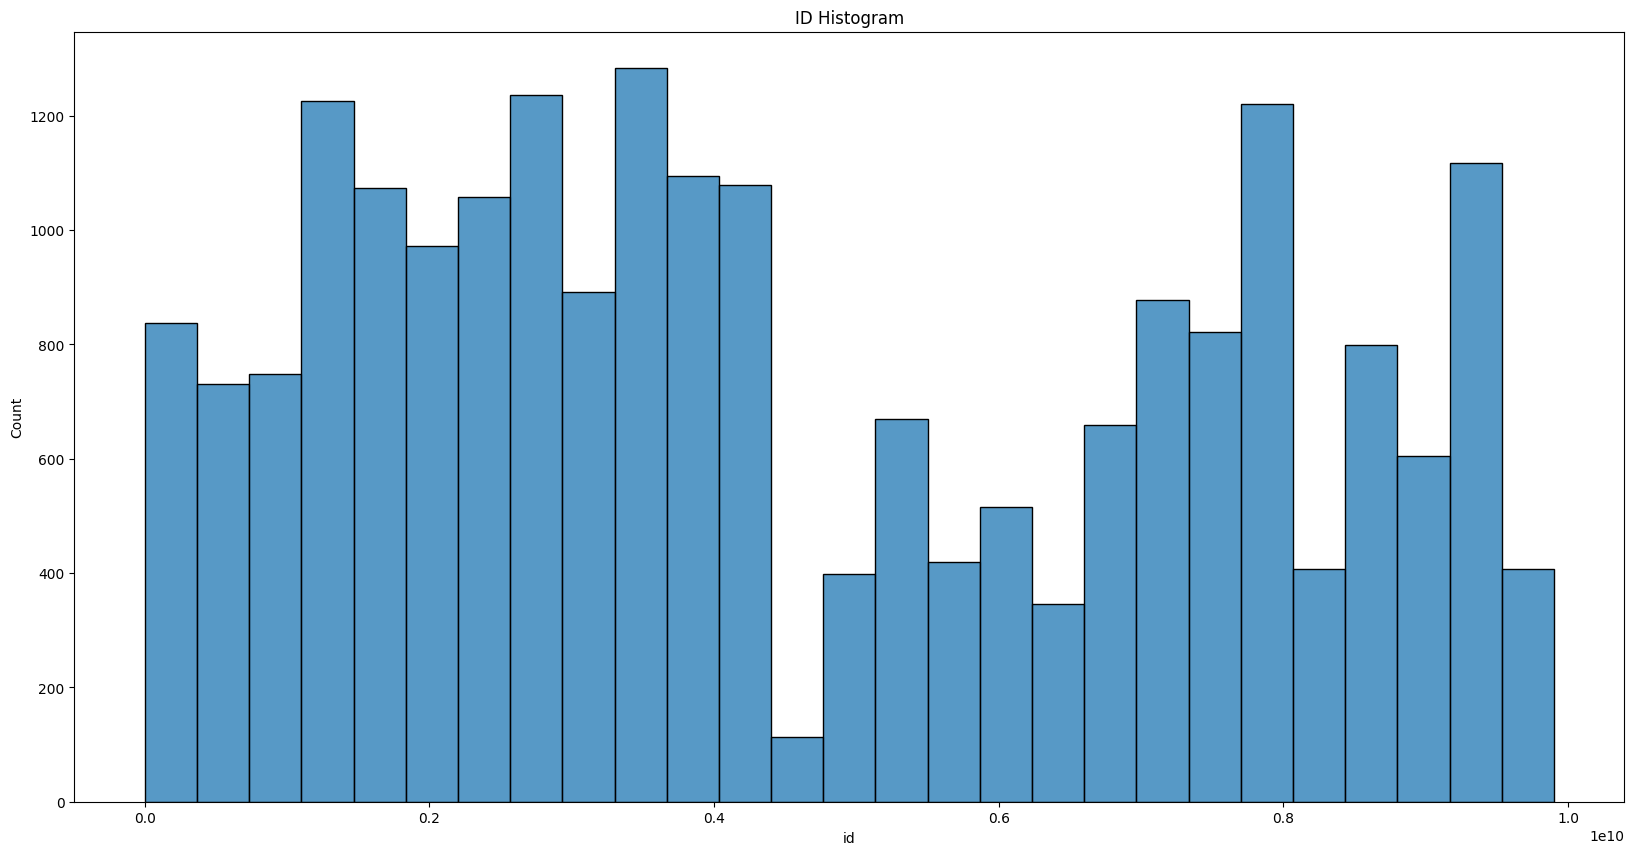

In [2982]:
#Check for outliers
plt.figure(figsize=(20,10))
sns.histplot(df['id'])
plt.title("ID Histogram")

Text(0.5, 1.0, 'Date Histogram')

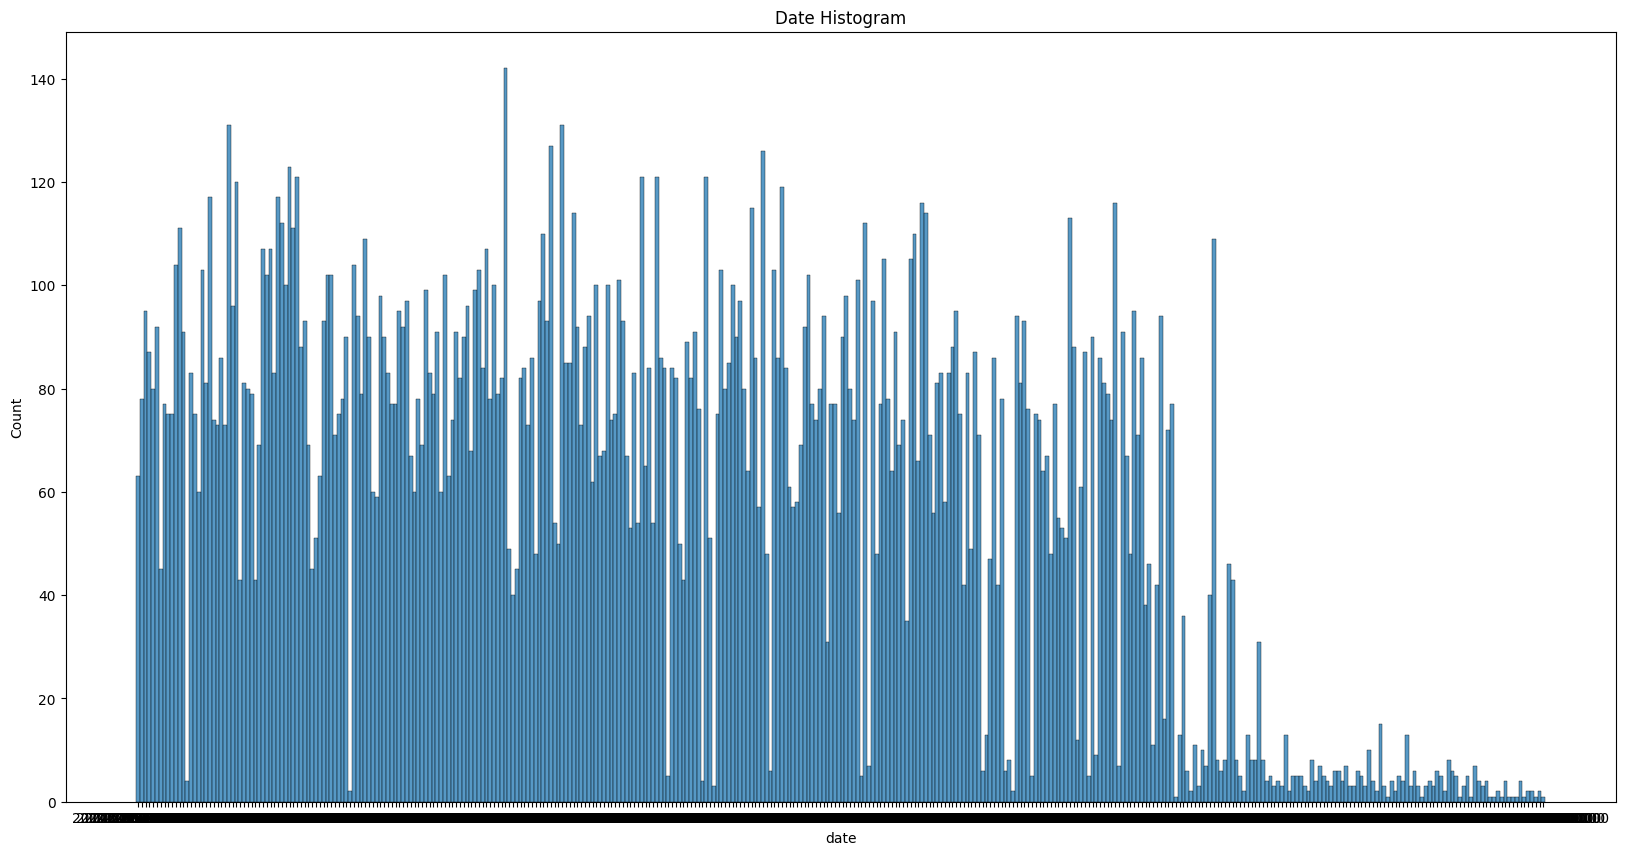

In [2983]:
plt.figure(figsize=(20,10))
sns.histplot(df['date'])
plt.title("Date Histogram")

Text(0.5, 1.0, 'Price Histogram')

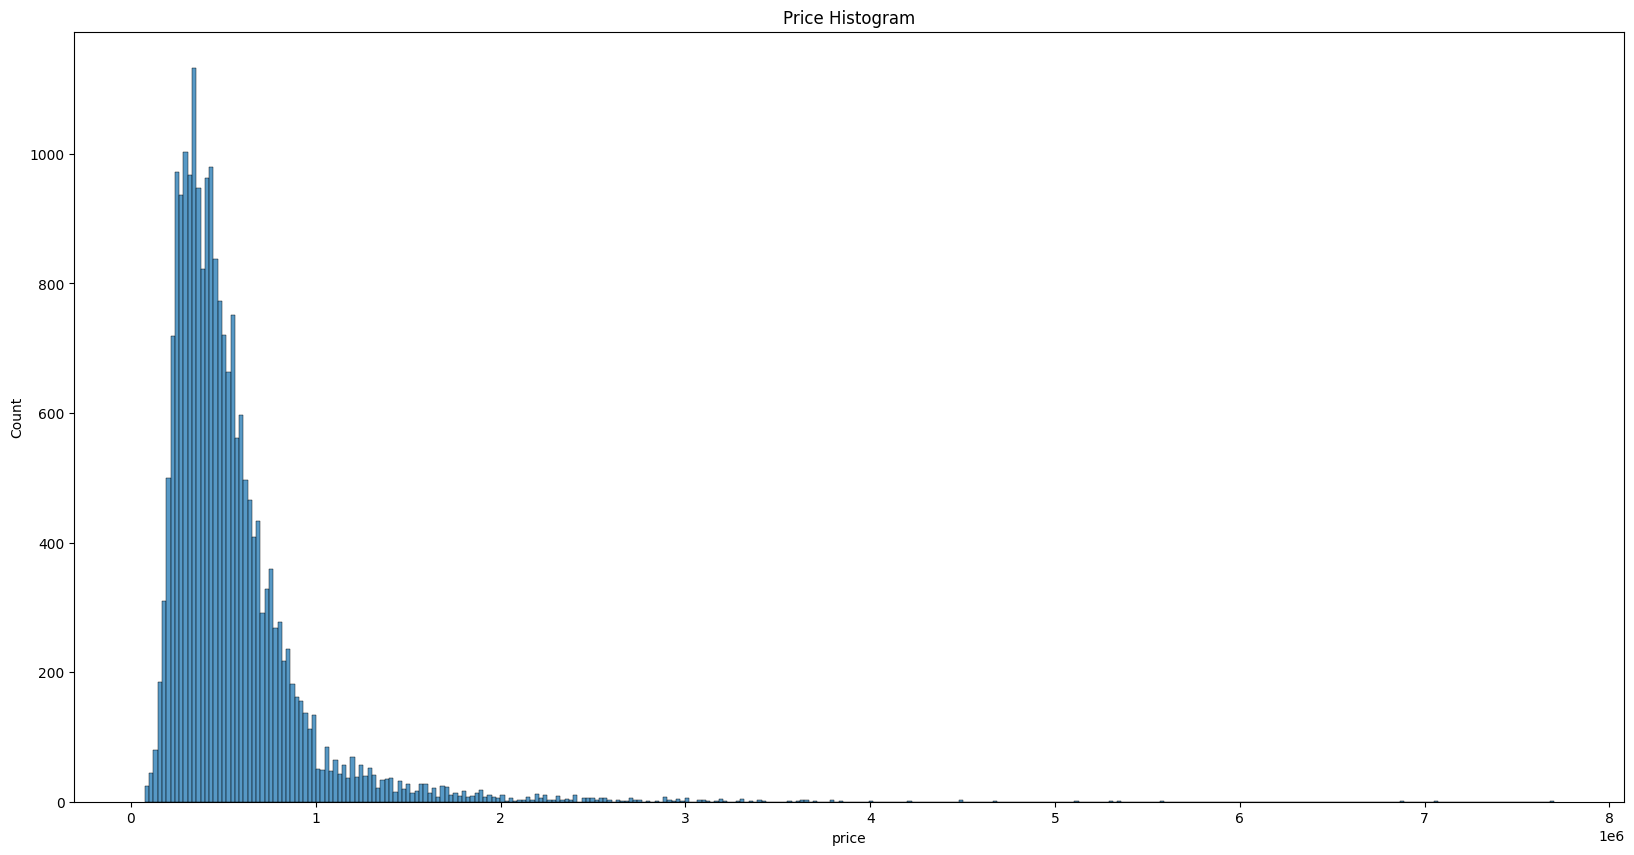

In [2984]:
plt.figure(figsize=(20,10))
sns.histplot(df['price'])
plt.title("Price Histogram")

Text(0.5, 1.0, 'Bedrooms Histogram')

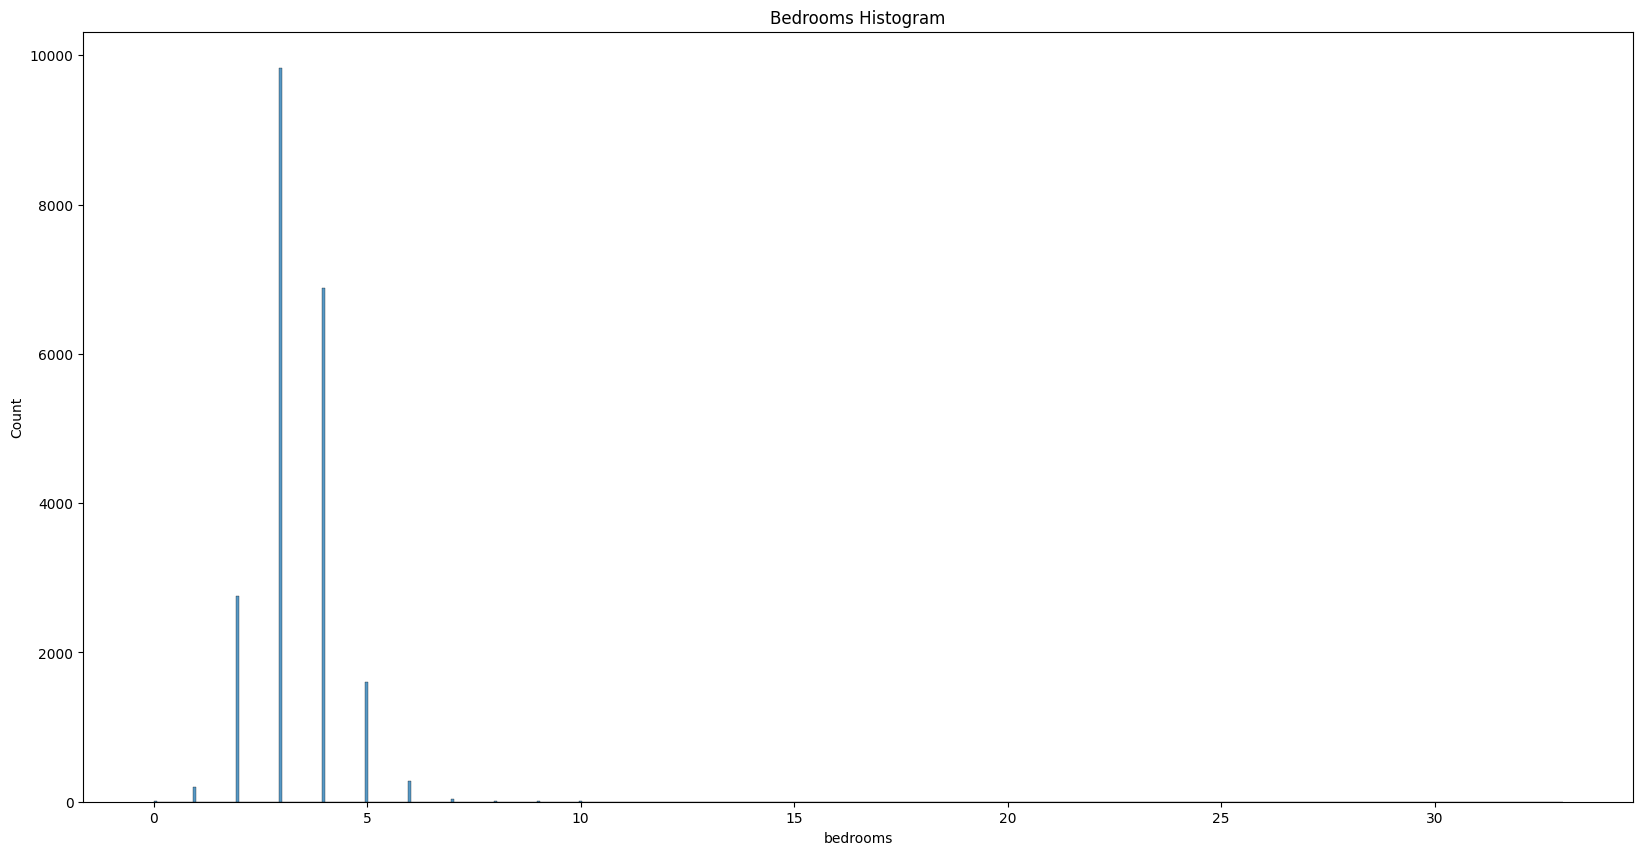

In [2985]:
plt.figure(figsize=(20,10))
sns.histplot(df['bedrooms'])
plt.title("Bedrooms Histogram")

Text(0.5, 1.0, 'Bedrooms Histogram')

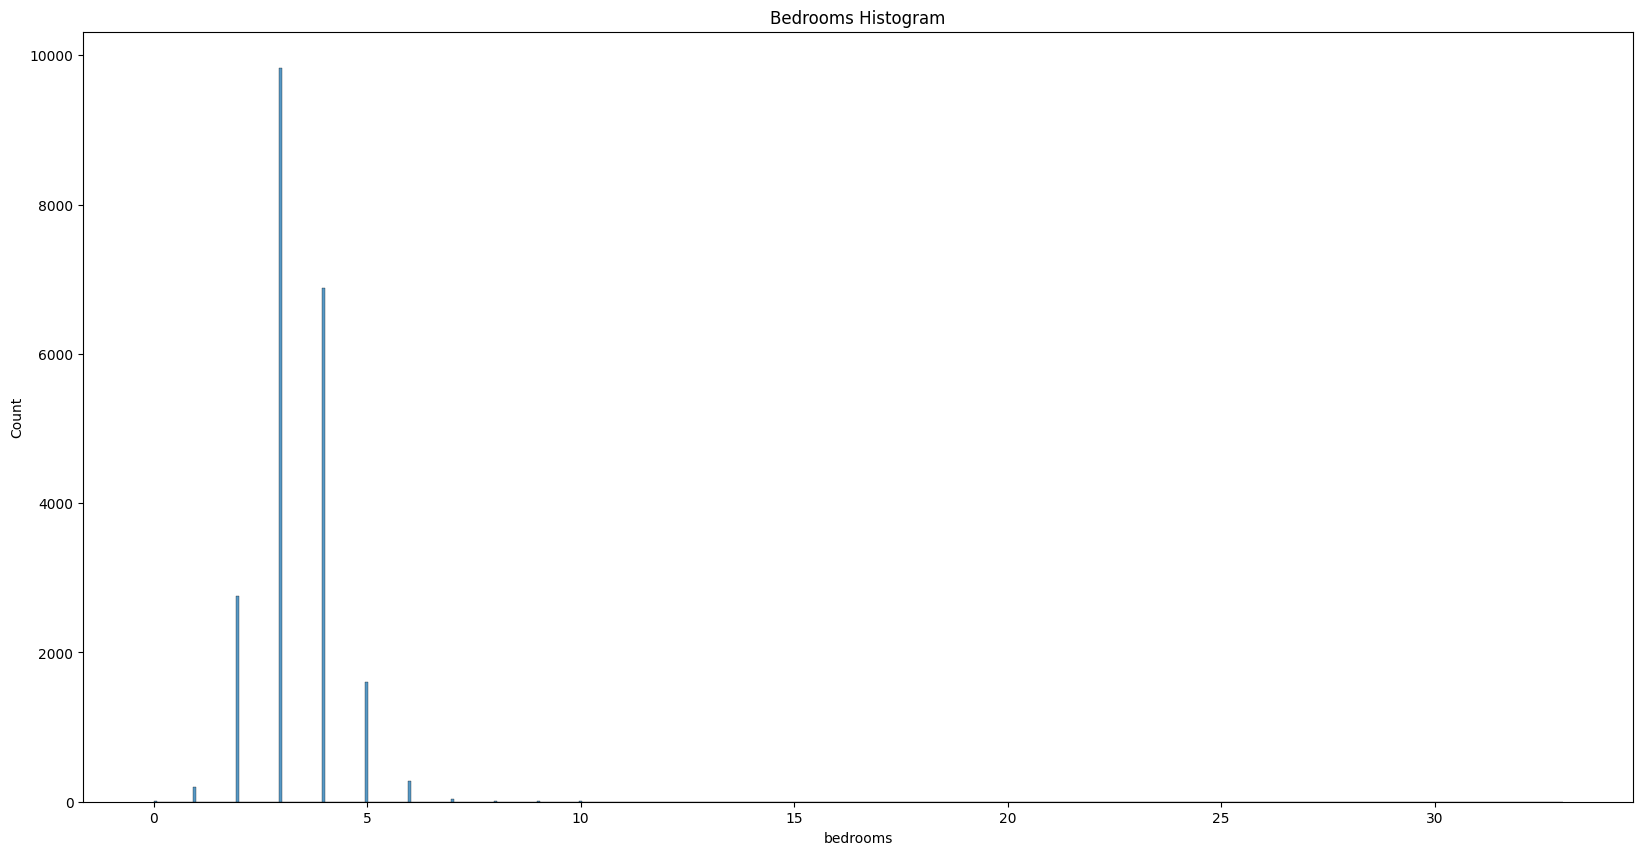

In [2986]:
plt.figure(figsize=(20,10))
sns.histplot(df['bedrooms'])
plt.title("Bedrooms Histogram")

Text(0.5, 1.0, 'Bathrooms Histogram')

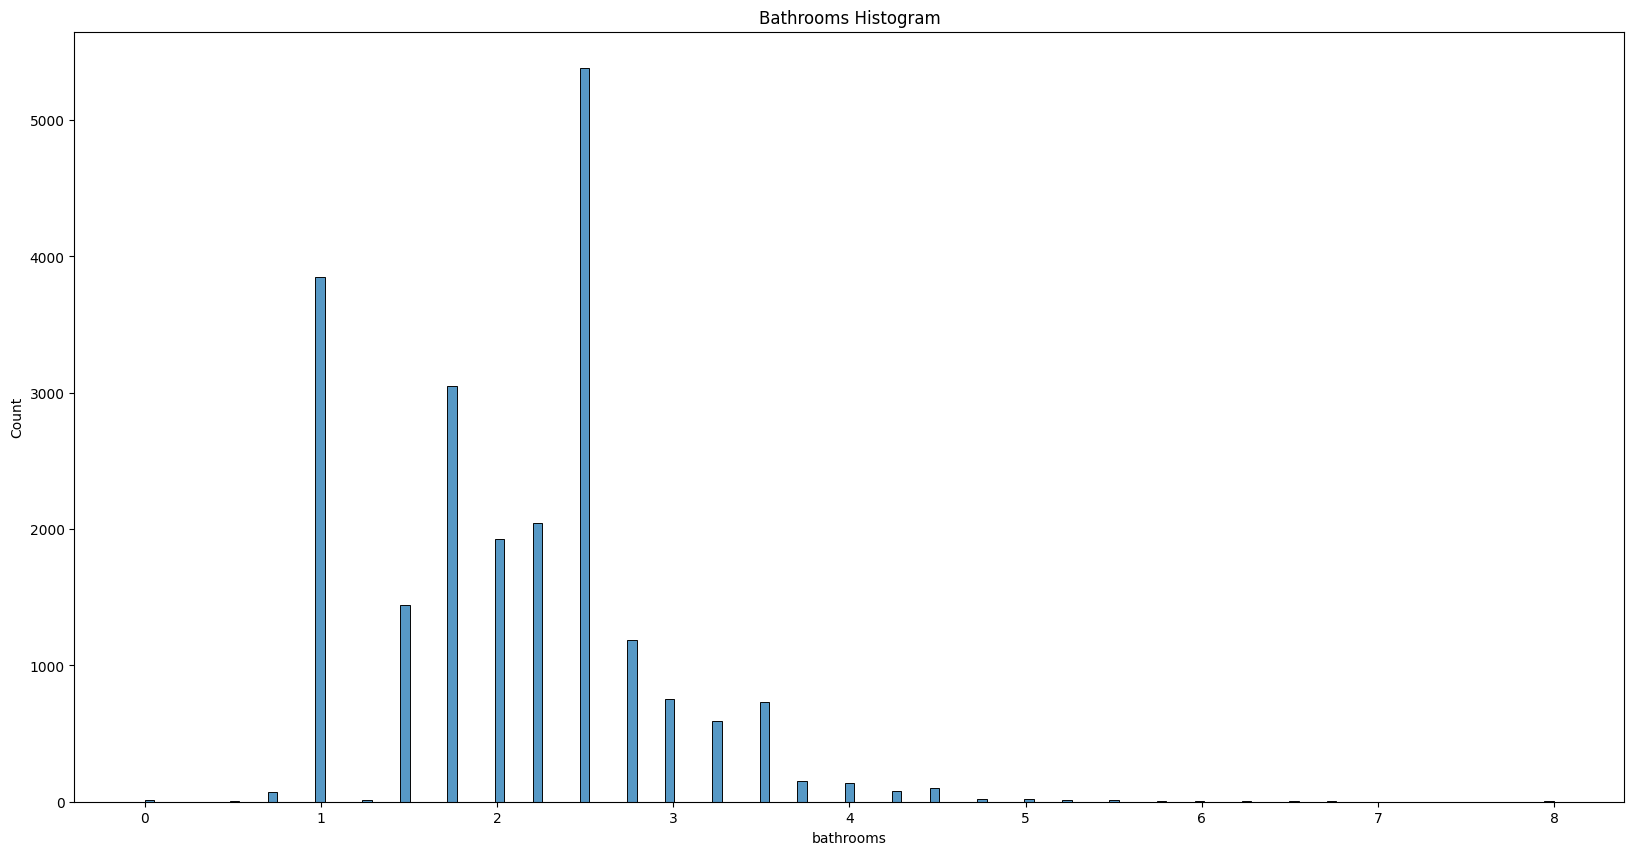

In [2987]:
plt.figure(figsize=(20,10))
sns.histplot(df['bathrooms'])
plt.title("Bathrooms Histogram")

Text(0.5, 1.0, 'Square Fooot Living Histogram')

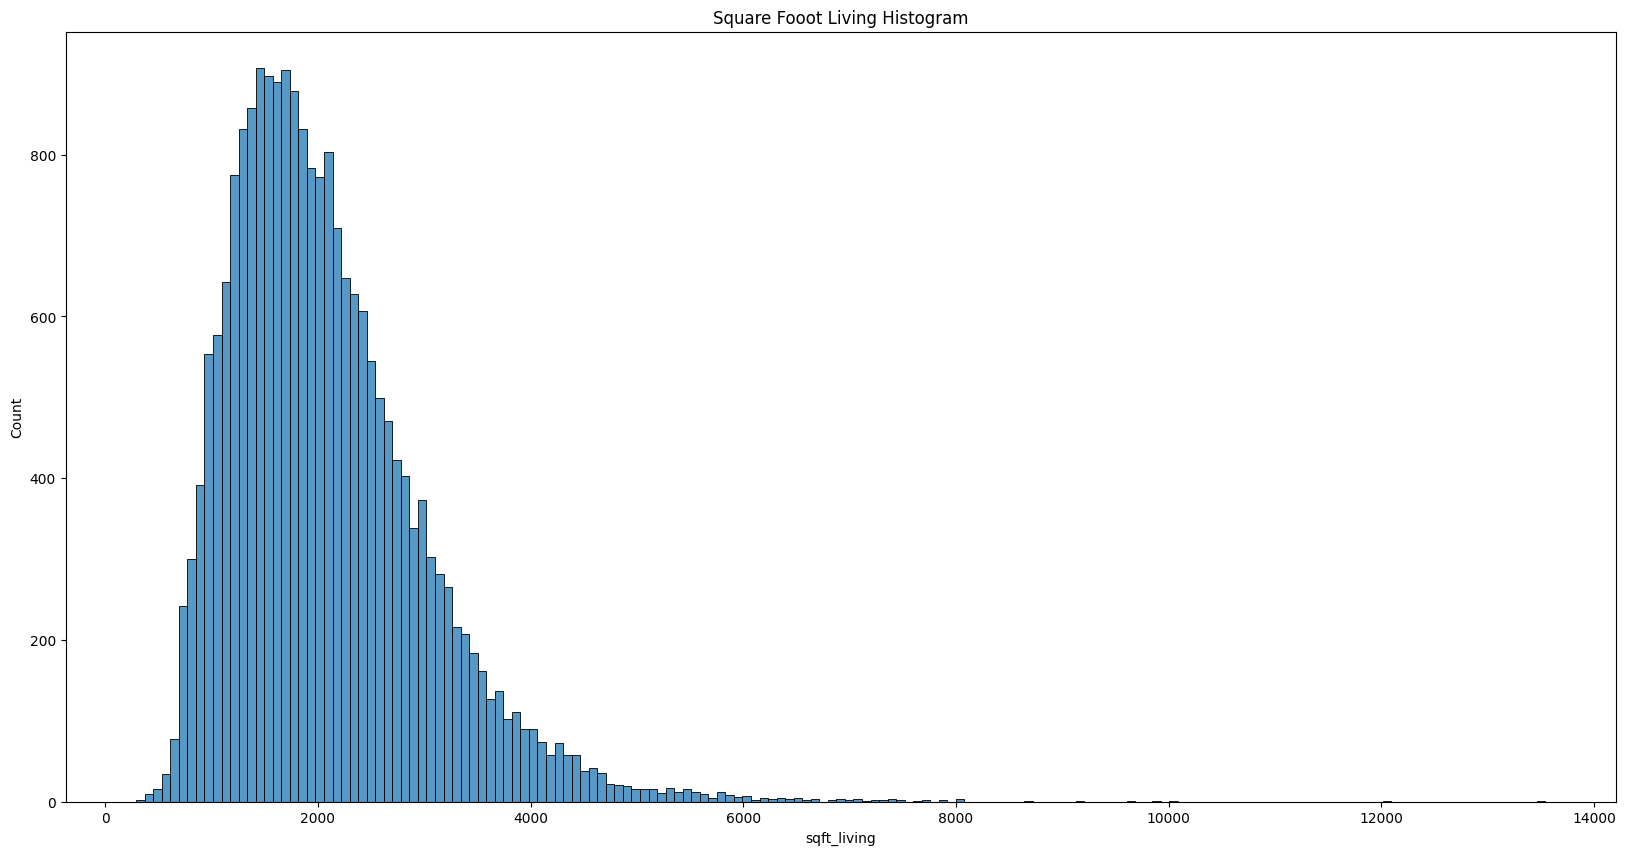

In [2988]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_living'])
plt.title("Square Fooot Living Histogram")

Text(0.5, 1.0, 'Square Lot Histogram')

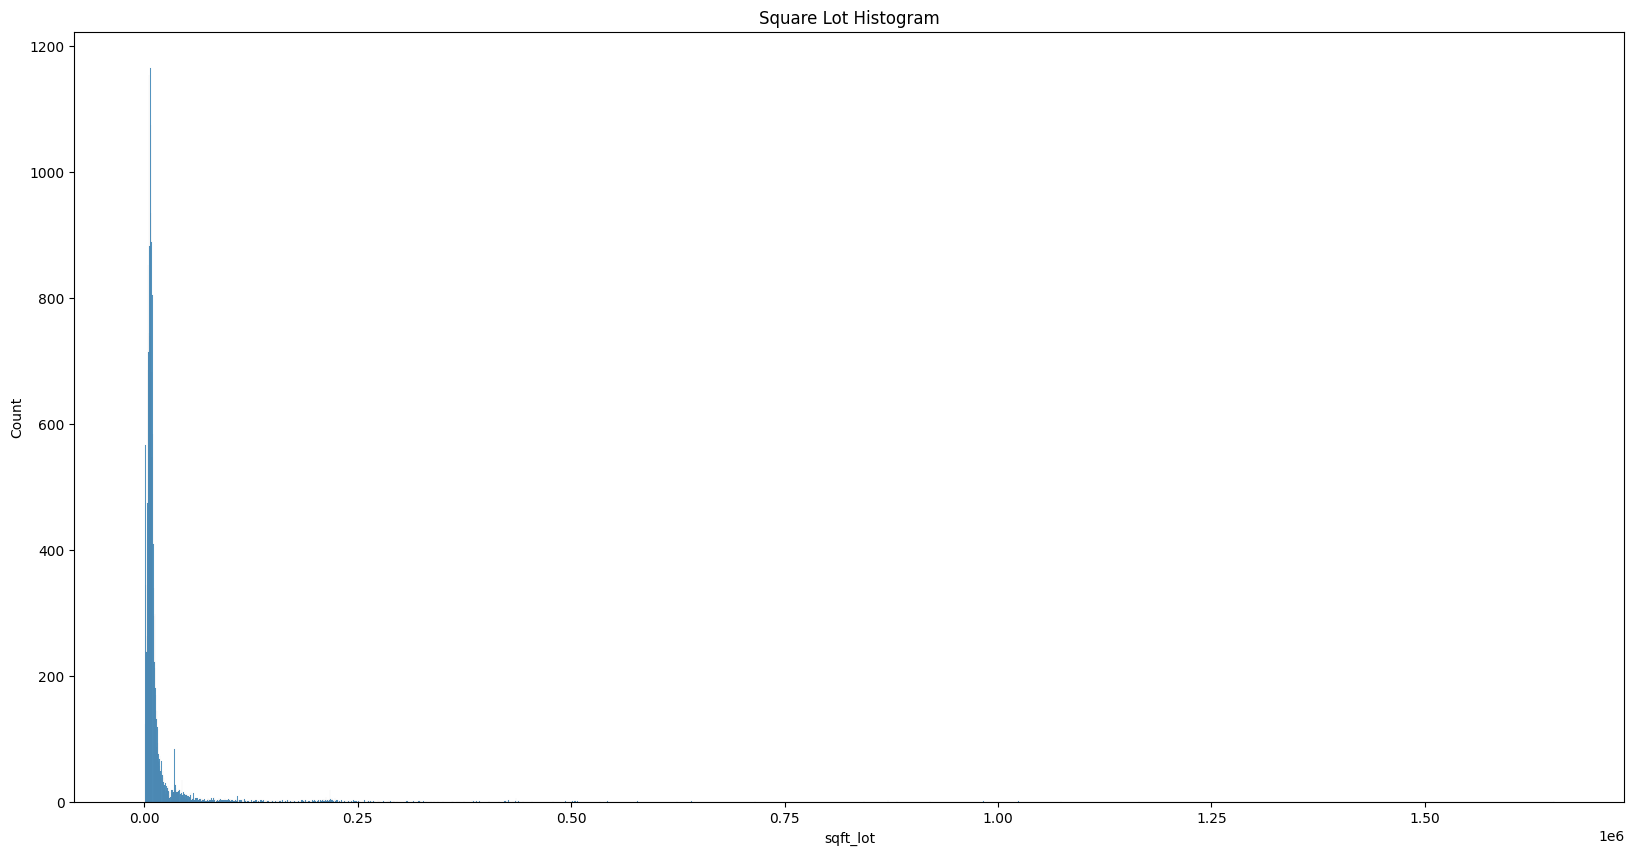

In [2989]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_lot'])
plt.title("Square Lot Histogram")

Text(0.5, 1.0, 'Floors Histogram')

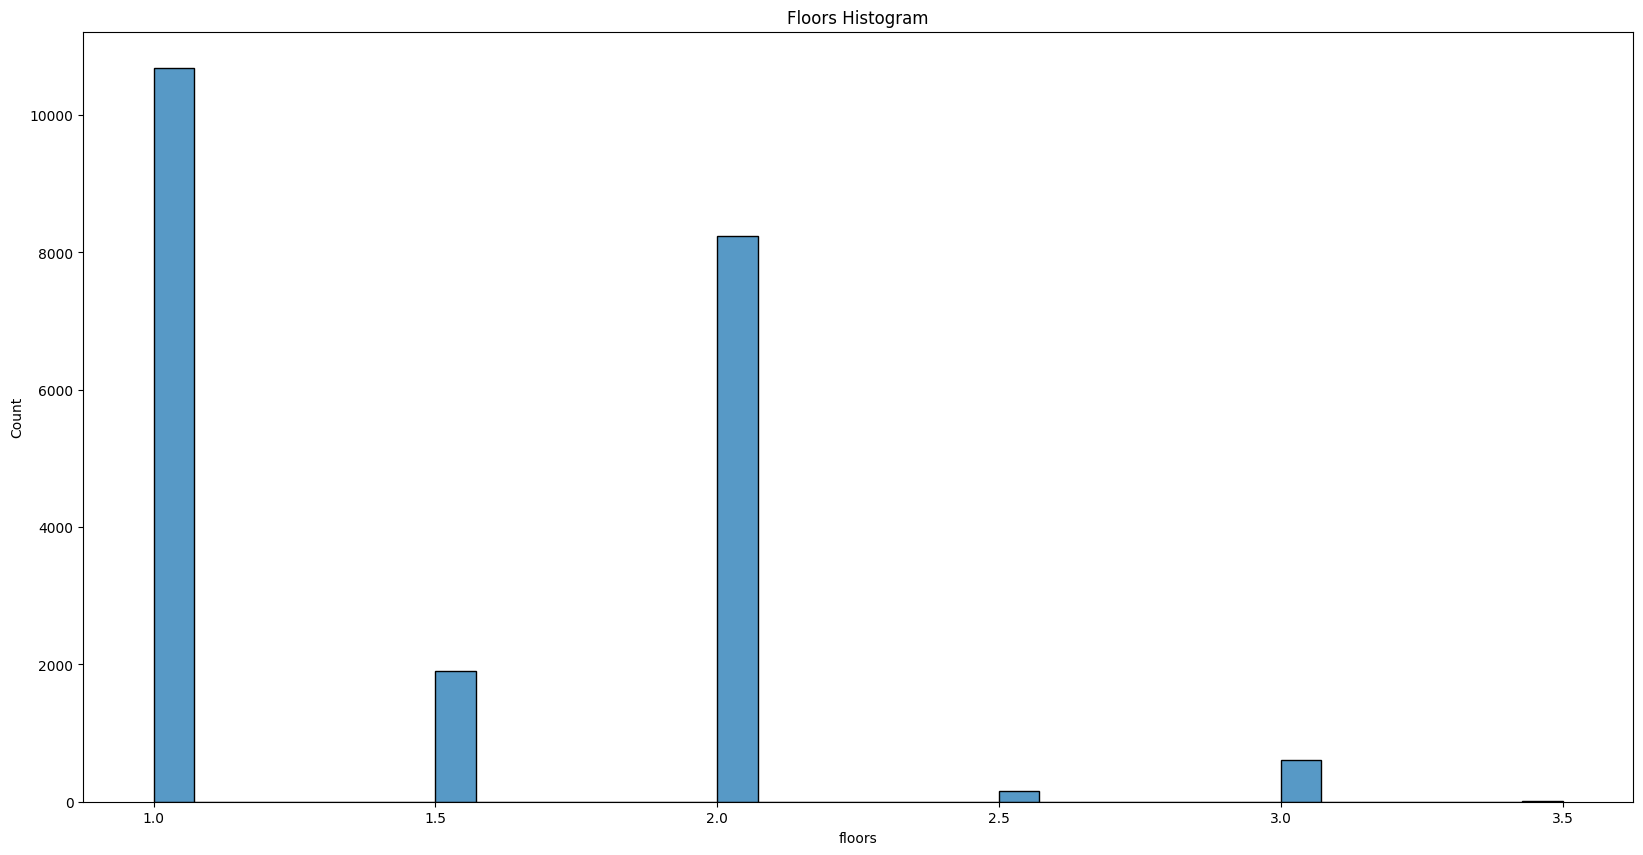

In [2990]:
plt.figure(figsize=(20,10))
sns.histplot(df['floors'])
plt.title("Floors Histogram")

Text(0.5, 1.0, 'Waterfront Histogram')

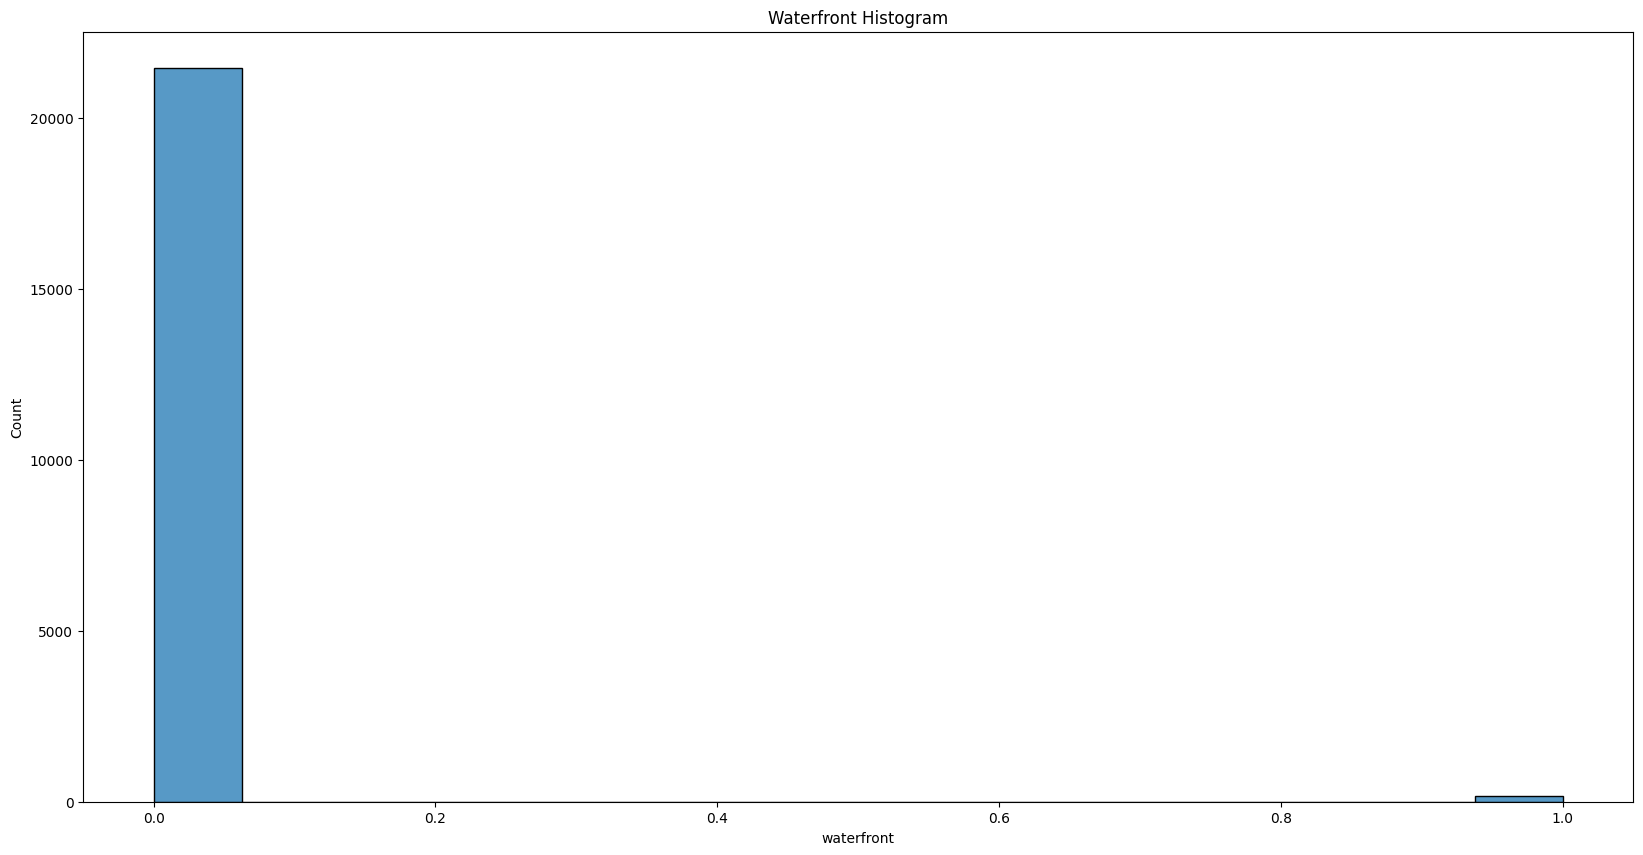

In [2991]:
plt.figure(figsize=(20,10))
sns.histplot(df['waterfront'])
plt.title("Waterfront Histogram")

Text(0.5, 1.0, 'View Histogram')

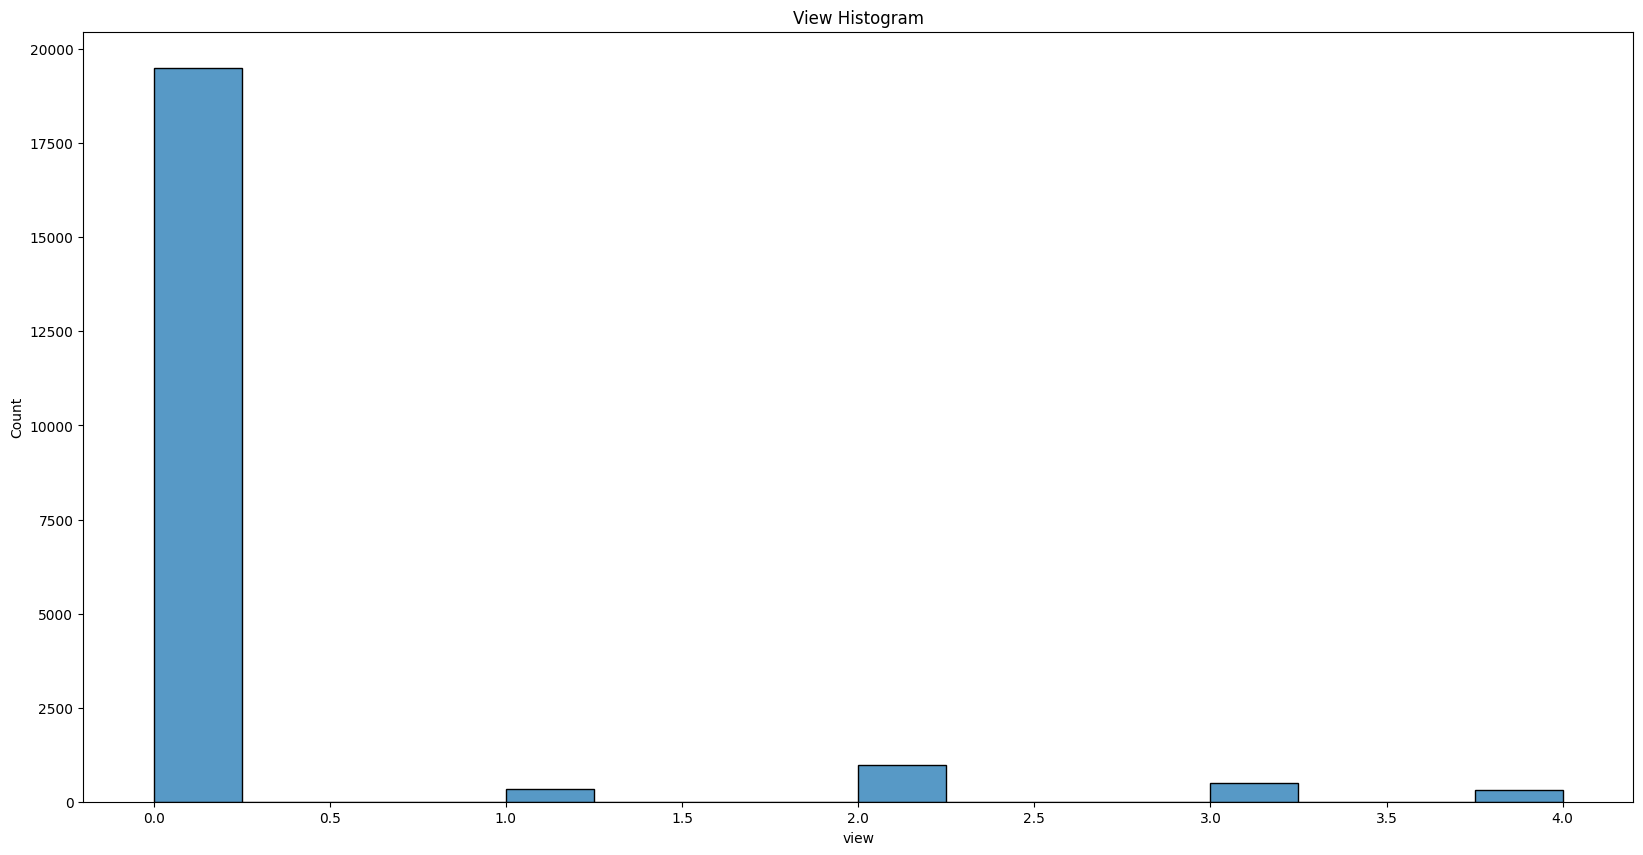

In [2992]:
plt.figure(figsize=(20,10))
sns.histplot(df['view'])
plt.title("View Histogram")

Text(0.5, 1.0, 'Condition Histogram')

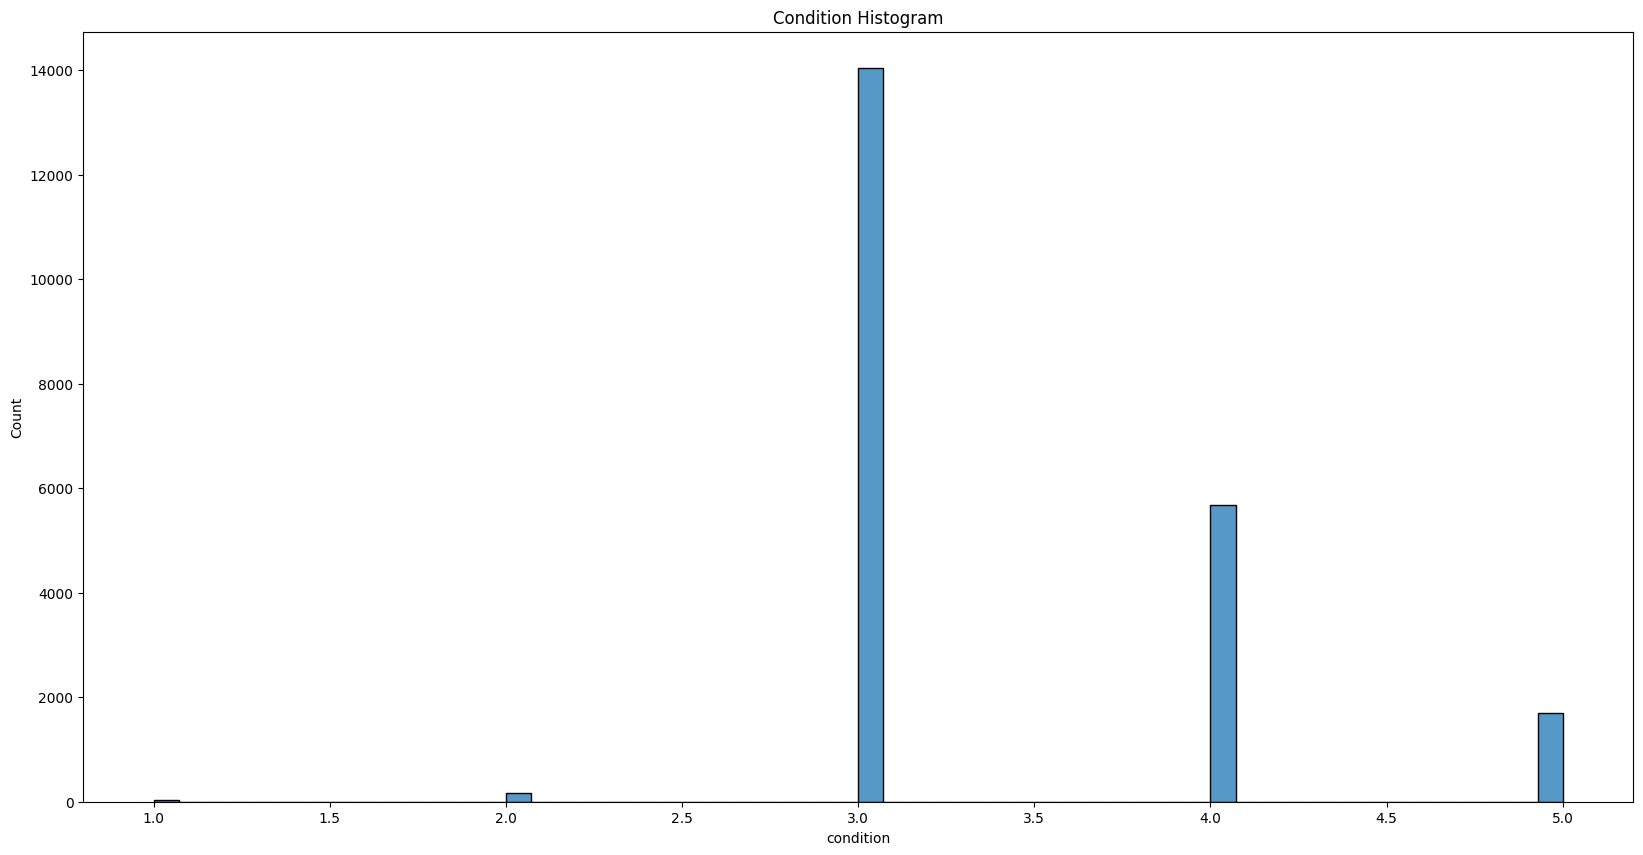

In [2993]:
plt.figure(figsize=(20,10))
sns.histplot(df['condition'])
plt.title("Condition Histogram")

Text(0.5, 1.0, 'Grade Histogram')

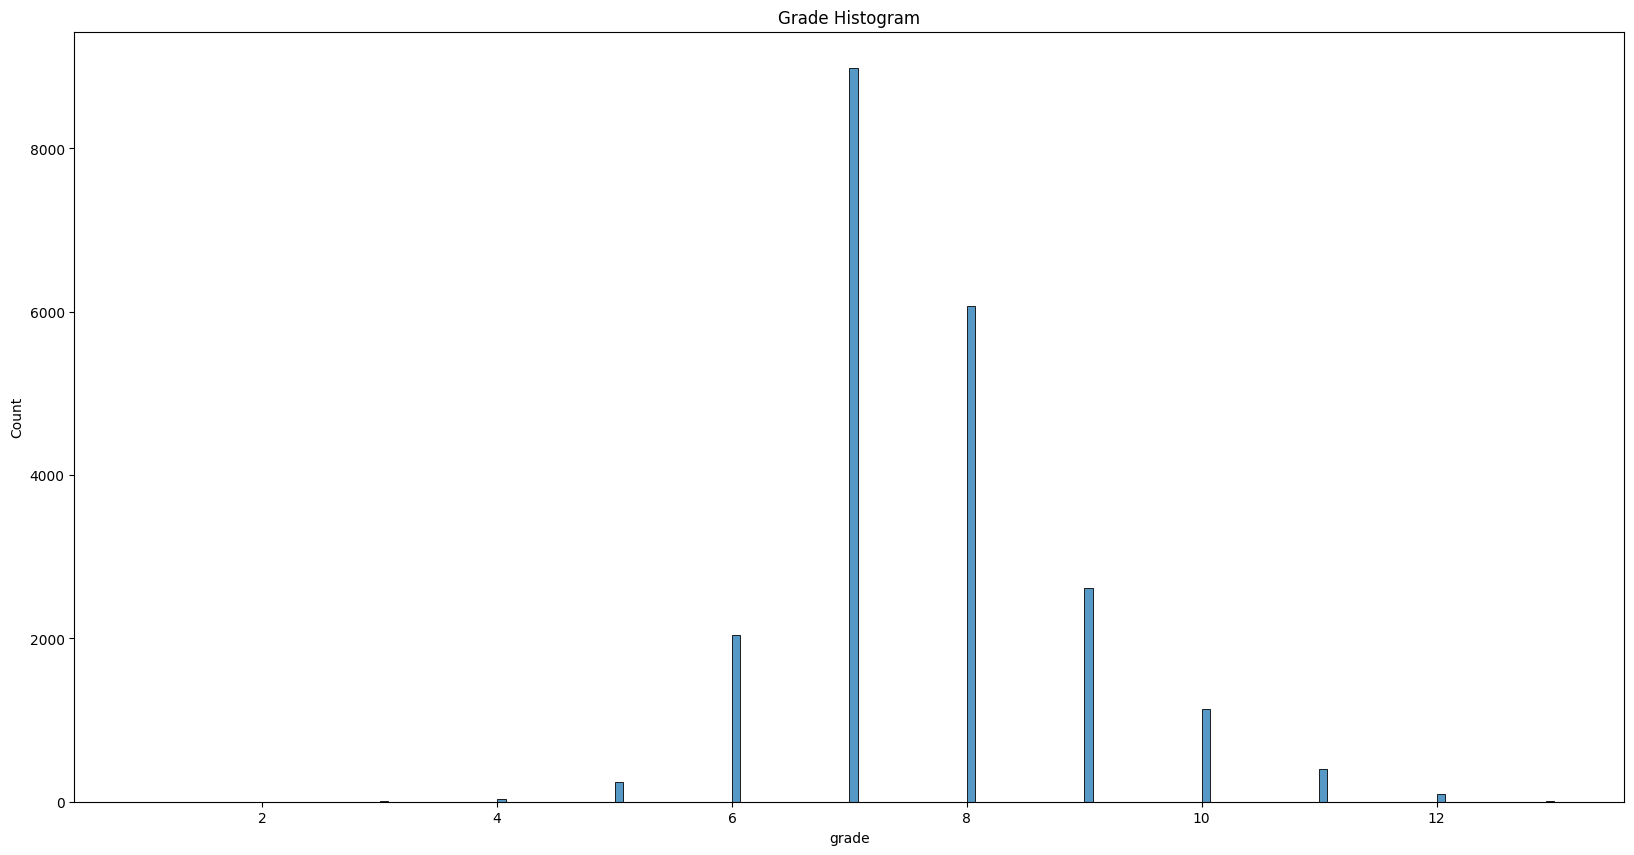

In [2994]:
plt.figure(figsize=(20,10))
sns.histplot(df['grade'])
plt.title("Grade Histogram")

Text(0.5, 1.0, 'Square Foot Above Histogram')

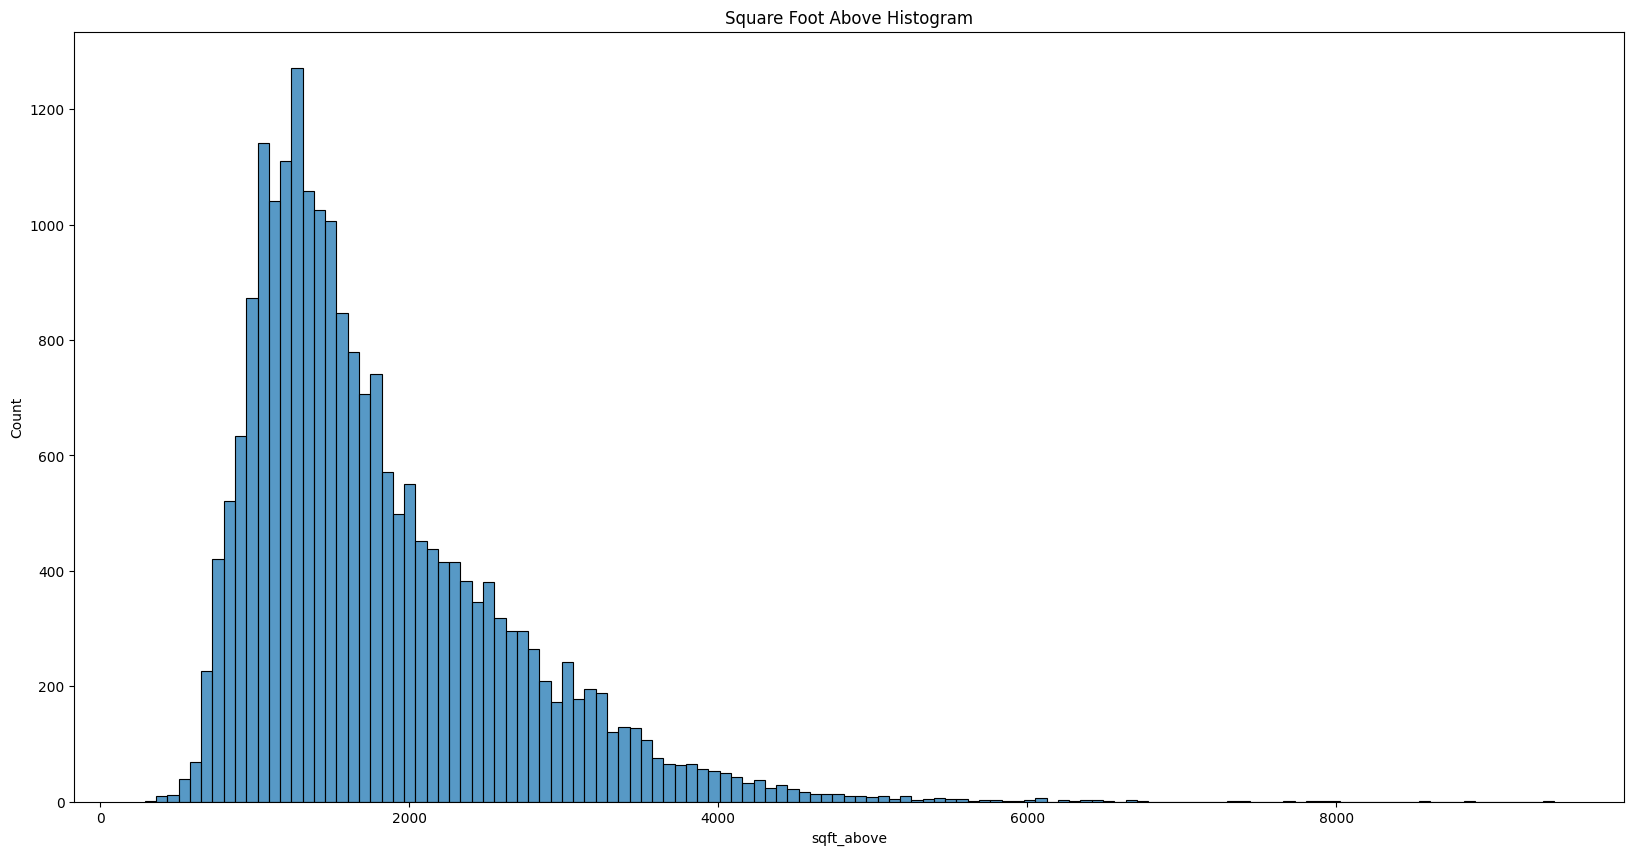

In [2995]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_above'])
plt.title("Square Foot Above Histogram")

Text(0.5, 1.0, 'Square Foot Basement Histogram')

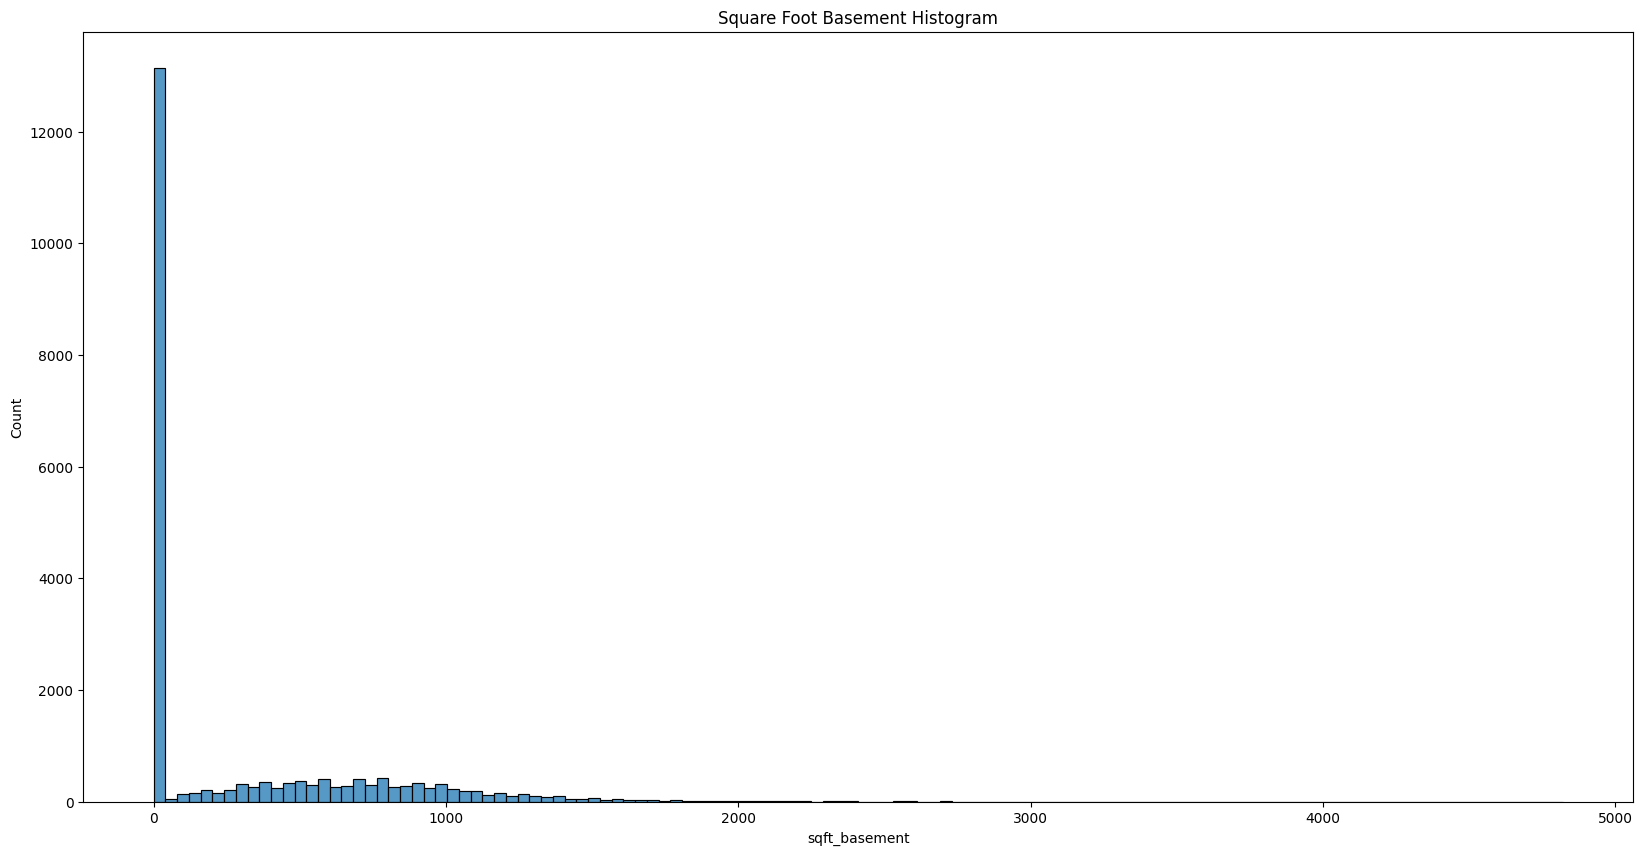

In [2996]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_basement'])
plt.title("Square Foot Basement Histogram")

Text(0.5, 1.0, 'Year Built Histogram')

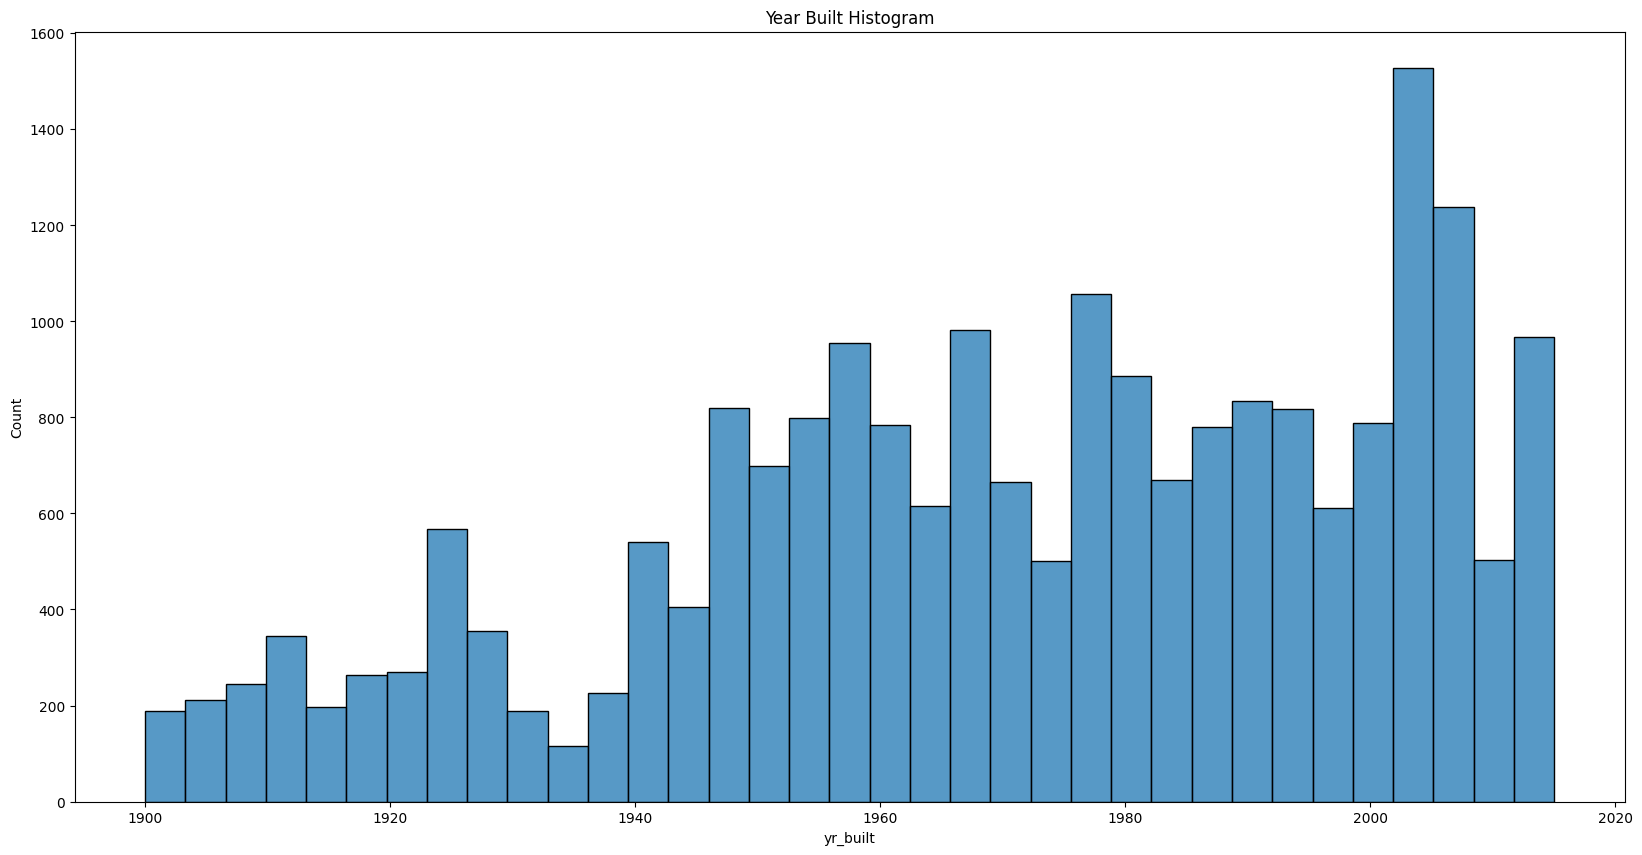

In [2997]:
plt.figure(figsize=(20,10))
sns.histplot(df['yr_built'])
plt.title("Year Built Histogram")

Text(0.5, 1.0, 'Year Renovated Histogram')

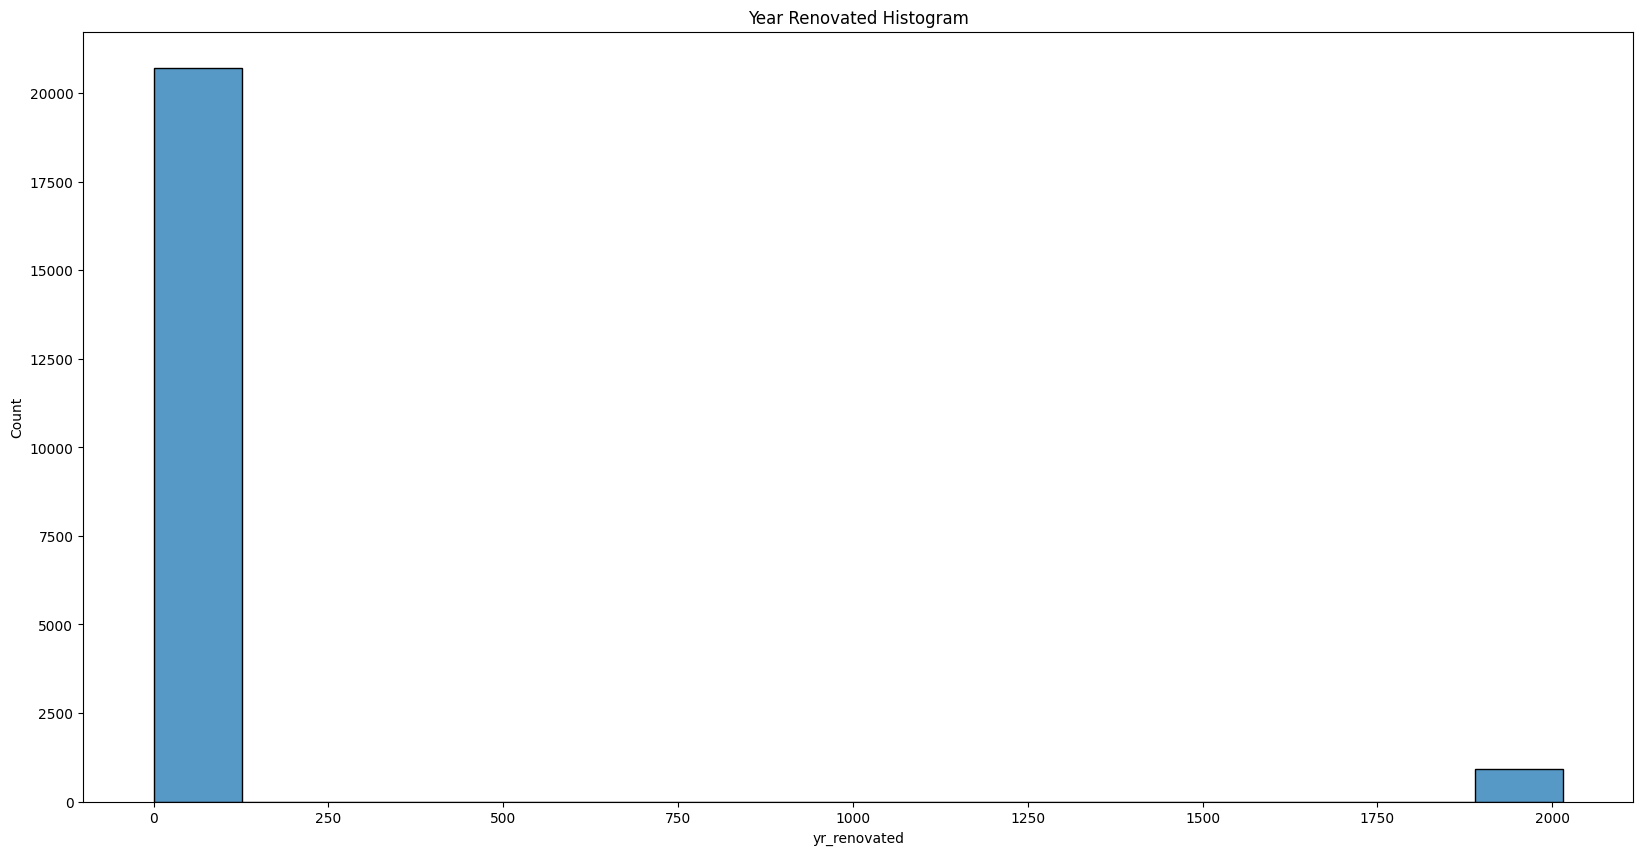

In [2998]:
plt.figure(figsize=(20,10))
sns.histplot(df['yr_renovated'])
plt.title("Year Renovated Histogram")

Text(0.5, 1.0, 'Zipcode Histogram')

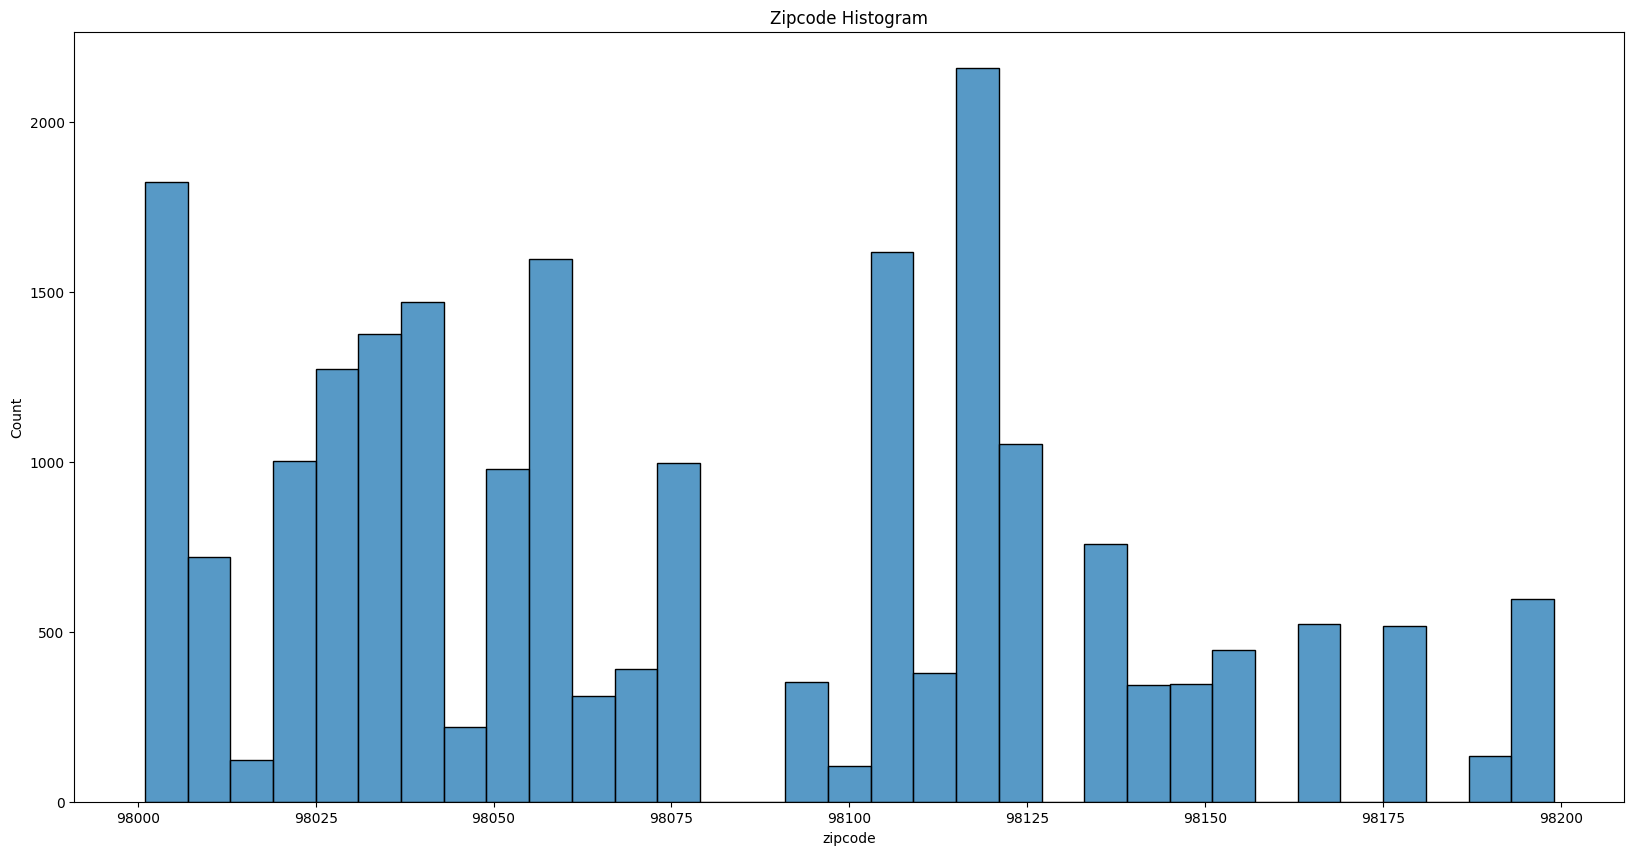

In [2999]:
plt.figure(figsize=(20,10))
sns.histplot(df['zipcode'])
plt.title("Zipcode Histogram")

Text(0.5, 1.0, 'Latitude Histogram')

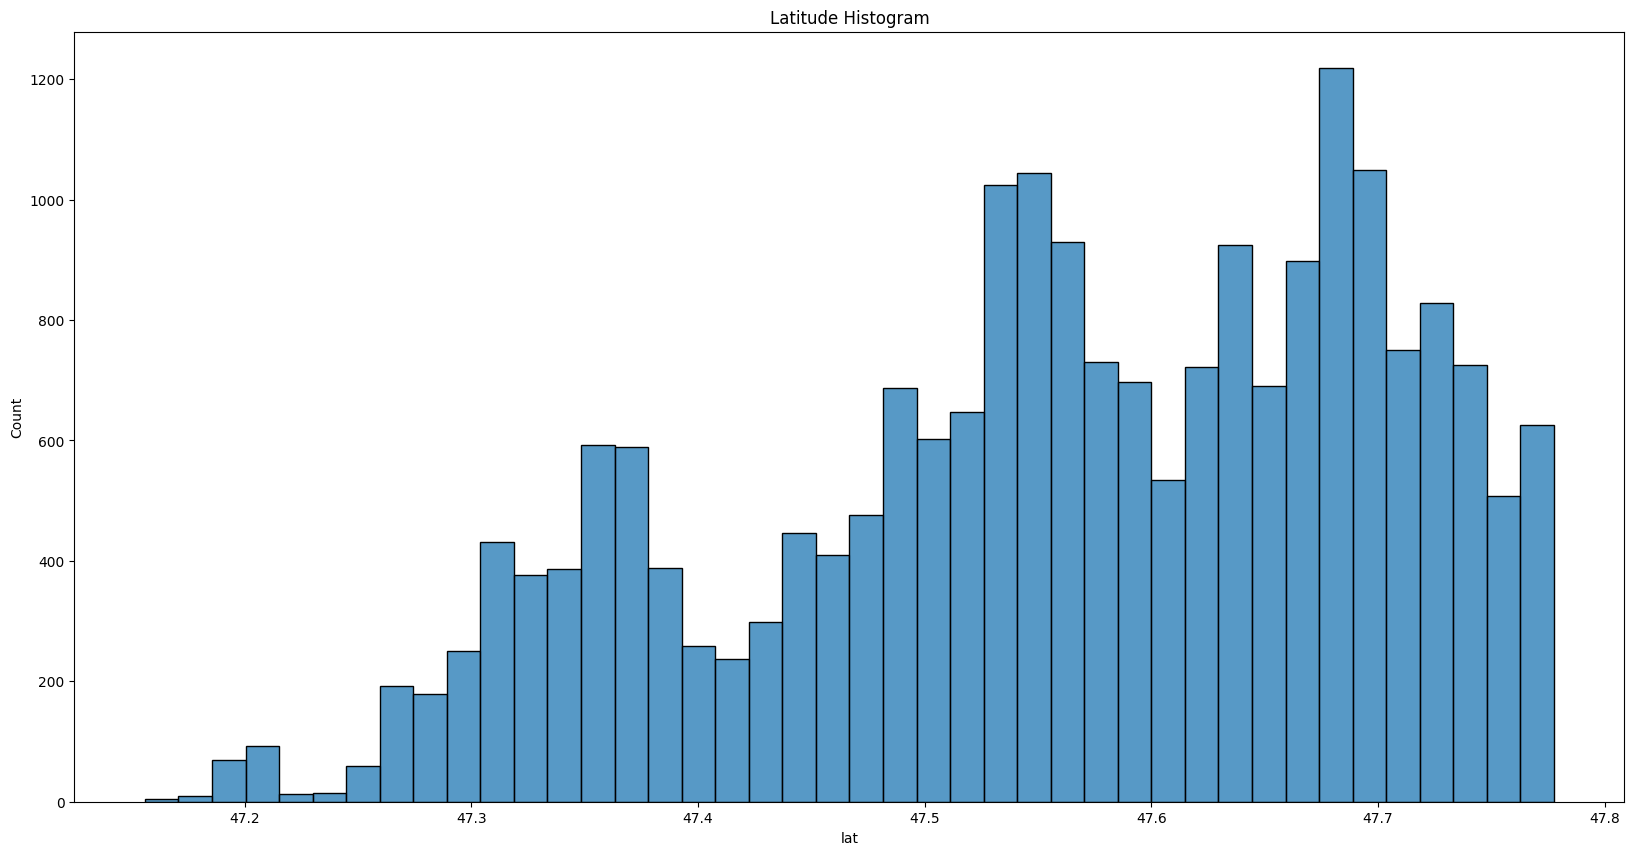

In [3000]:
plt.figure(figsize=(20,10))
sns.histplot(df['lat'])
plt.title("Latitude Histogram")

Text(0.5, 1.0, 'Longitude Histogram')

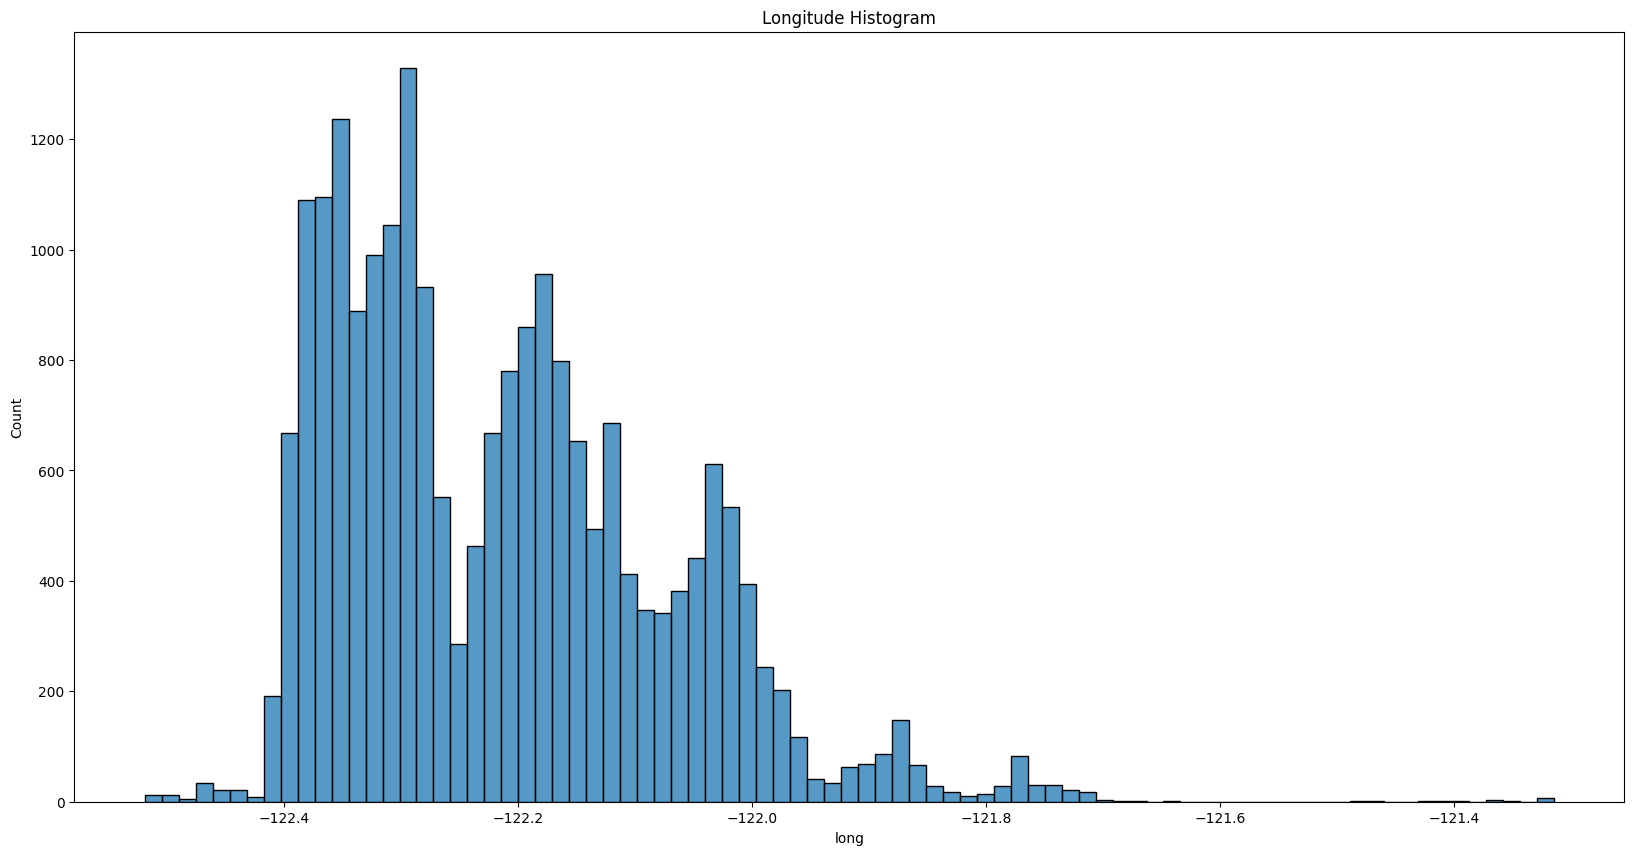

In [3001]:
plt.figure(figsize=(20,10))
sns.histplot(df['long'])
plt.title("Longitude Histogram")

Text(0.5, 1.0, 'Square Foot Living 15 Histogram')

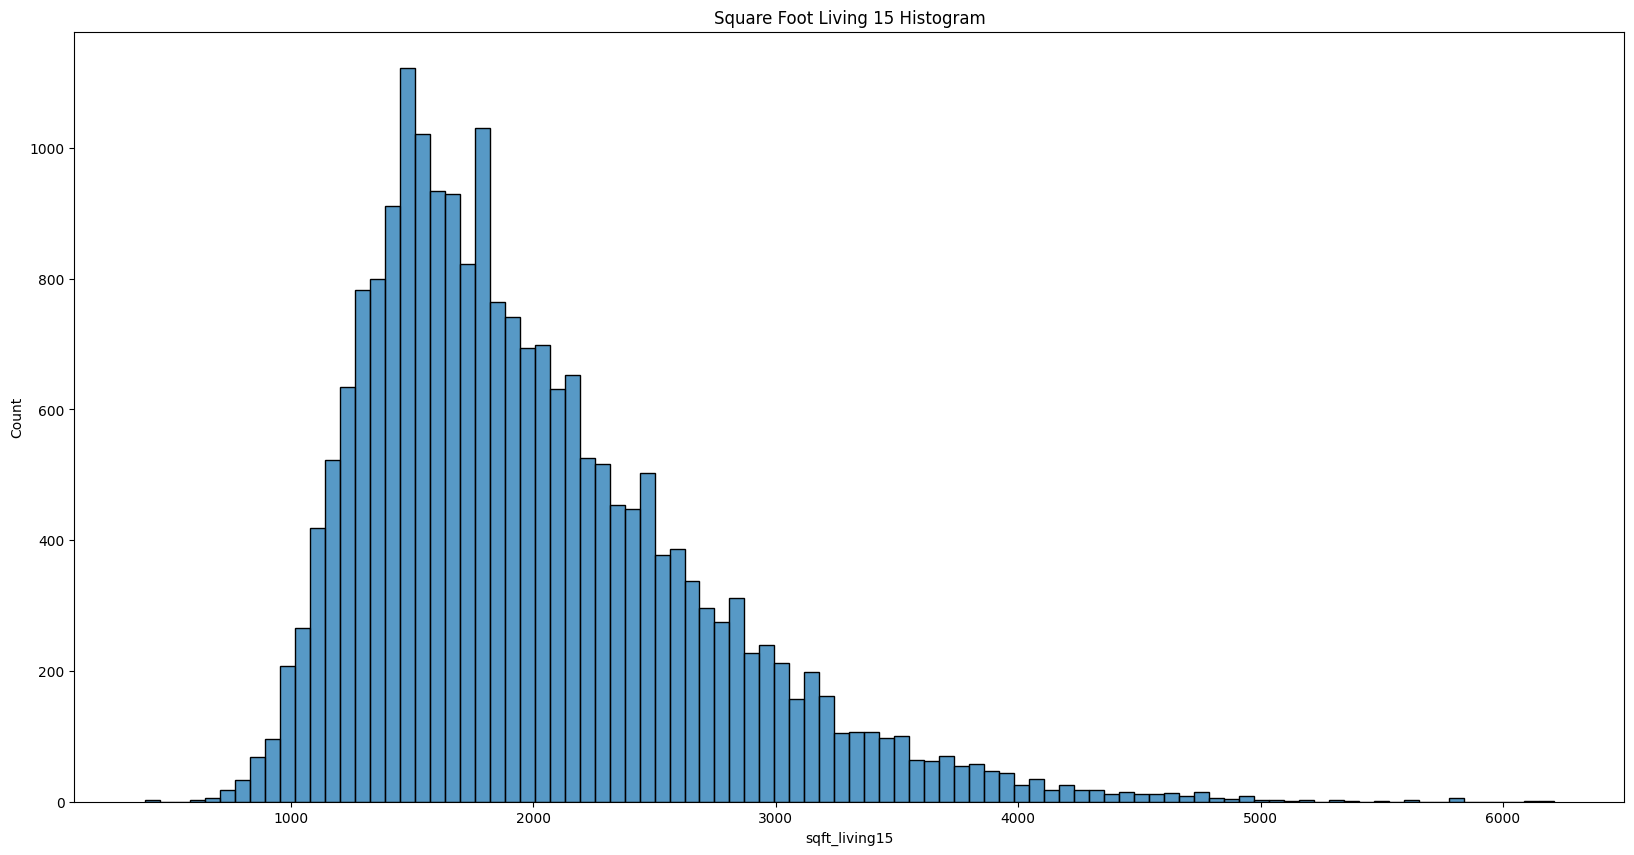

In [3002]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_living15'])
plt.title("Square Foot Living 15 Histogram")

Text(0.5, 1.0, 'Square Foot Lot 15 Histogram')

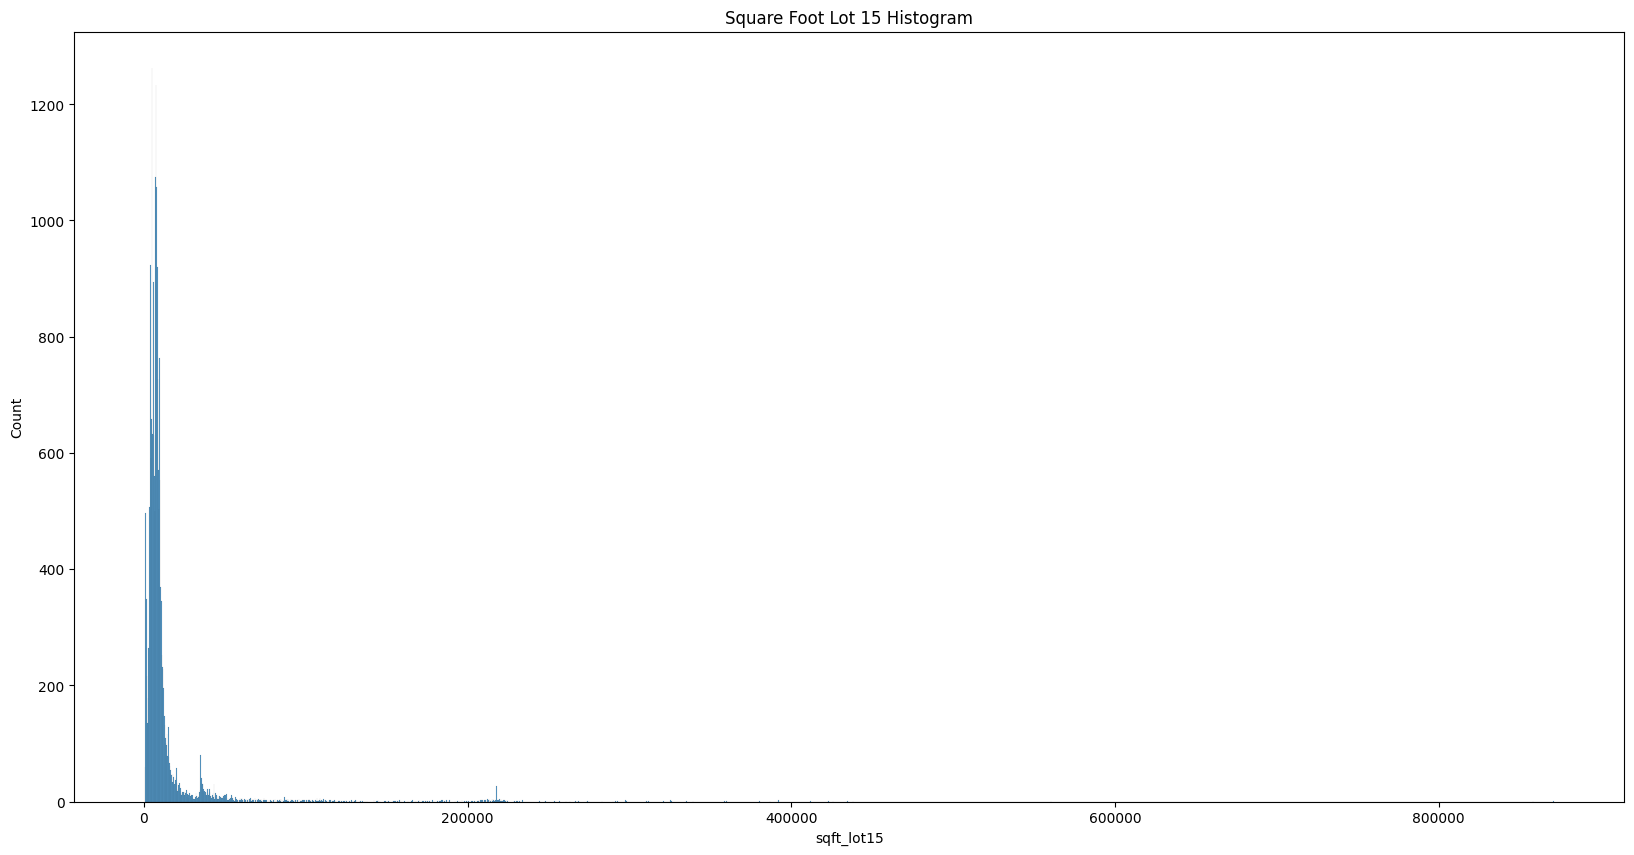

In [3003]:
plt.figure(figsize=(20,10))
sns.histplot(df['sqft_lot15'])
plt.title("Square Foot Lot 15 Histogram")

In [3004]:
#Before using boxplots on select variables to further analyze potential variables, drop duplicates
duplicated_values = df.duplicated()
duplicated_values.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: None
Non-Null Count  Dtype
--------------  -----
21613 non-null  bool 
dtypes: bool(1)
memory usage: 21.2 KB


In [3005]:
duplicated_values.describe(include='all')

count     21613
unique        1
top       False
freq      21613
dtype: object

In [3006]:
print(duplicated_values)

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool


In [3007]:
#Doesn't appear to be any duplicates, but lets drop in case
df.drop_duplicates(inplace=True)

In [3008]:
#Check data frame
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Text(0, 0.5, 'Price')

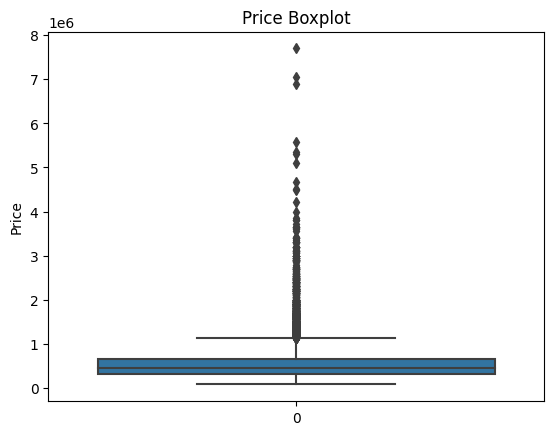

In [3009]:
#Make boxplots for certain variables to check outliers, outliers are subjective, so data will be removed as were checking
sns.boxplot(df['price'])
plt.title("Price Boxplot")
plt.ylabel("Price")

In [3010]:
# Identify the outliers and drop them
df[df['price'] > 6000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [3011]:
df.drop(3914, axis=0, inplace=True)
df.drop(7252, axis=0, inplace=True)
df.drop(9254, axis=0, inplace=True)

Text(0, 0.5, 'Bathrooms')

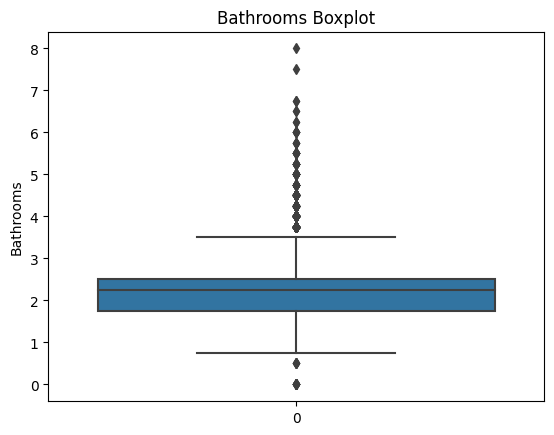

In [3012]:
sns.boxplot(df['bathrooms'])
plt.title("Bathrooms Boxplot")
plt.ylabel("Bathrooms")

Text(0, 0.5, 'Square Foot Living')

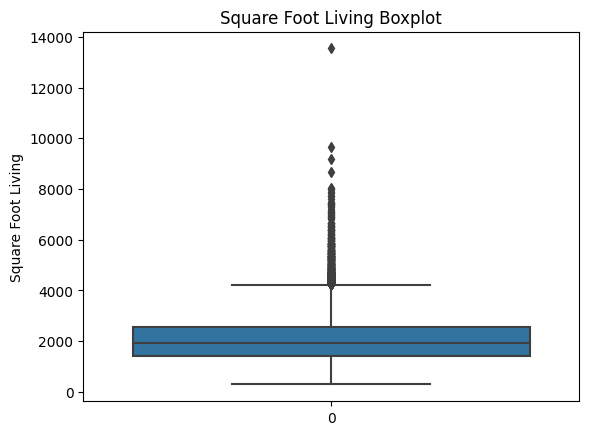

In [3013]:
sns.boxplot(df['sqft_living'])
plt.title("Square Foot Living Boxplot")
plt.ylabel("Square Foot Living")

In [3014]:
df[df['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [3015]:
df.drop(12777, axis=0, inplace=True)

Text(0, 0.5, 'Square Foot Lot')

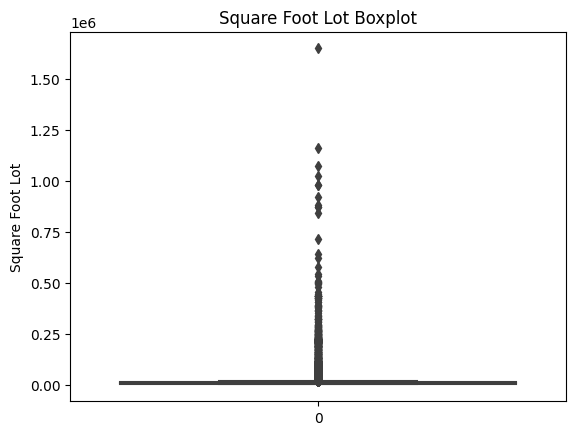

In [3016]:
sns.boxplot(df['sqft_lot'])
plt.title("Square Foot Lot Boxplot")
plt.ylabel("Square Foot Lot")

In [3017]:
df[df['sqft_lot'] > 1500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327T000000,700000.0,4,1.0,1300,1651359,1.0,0,3,...,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581


In [3018]:
df.drop(1719, axis=0, inplace=True)

Text(0, 0.5, 'Square Foot Above')

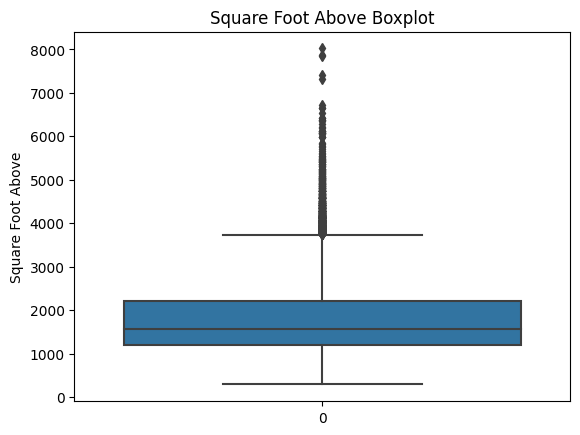

In [3019]:
sns.boxplot(df['sqft_above'])
plt.title("Square Foot Above Boxplot")
plt.ylabel("Square Foot Above")

Text(0, 0.5, 'Square Foot Basement')

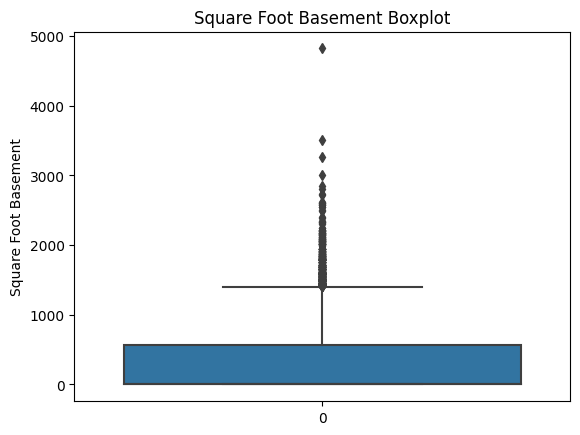

In [3020]:
sns.boxplot(df['sqft_basement'])
plt.title("Square Foot Basement Boxplot")
plt.ylabel("Square Foot Basement")

In [3021]:
df[df['sqft_basement'] > 4000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.557,-122.21,3270,10454


In [3022]:
df.drop(8092, axis=0, inplace=True)

Text(0, 0.5, 'Square Foot Living 15')

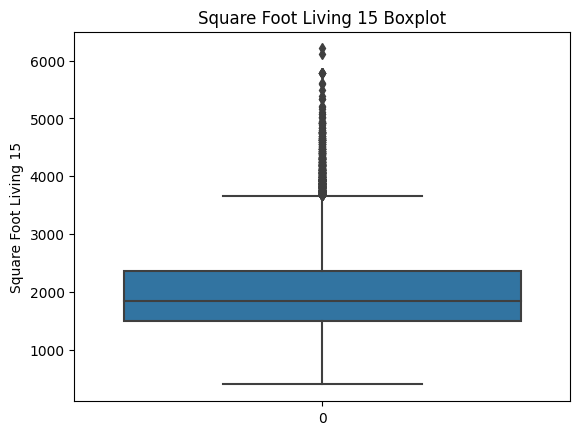

In [3023]:
sns.boxplot(df['sqft_living15'])
plt.title("Square Foot Living 15 Boxplot")
plt.ylabel("Square Foot Living 15")

Text(0, 0.5, 'Square Foot Lot 15')

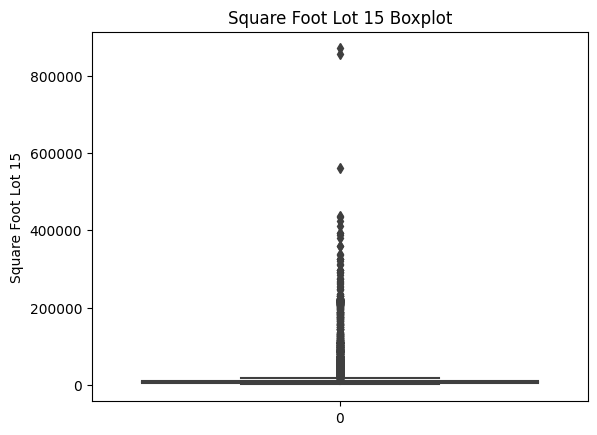

In [3024]:
sns.boxplot(df['sqft_lot15'])
plt.title("Square Foot Lot 15 Boxplot")
plt.ylabel("Square Foot Lot 15")

In [3025]:
df[df['sqft_lot15'] > 600000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,20150107T000000,937500.0,4,4.0,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.676,-121.882,3420,871200
20452,1125079111,20150415T000000,1600000.0,4,5.5,6530,871200,2.0,0,2,...,11,6530,0,2008,0,98014,47.664,-121.878,1280,858132


In [3026]:
df.drop(9714, axis=0, inplace=True)
df.drop(20452, axis=0, inplace=True)

Text(0, 0.5, 'Bedrooms')

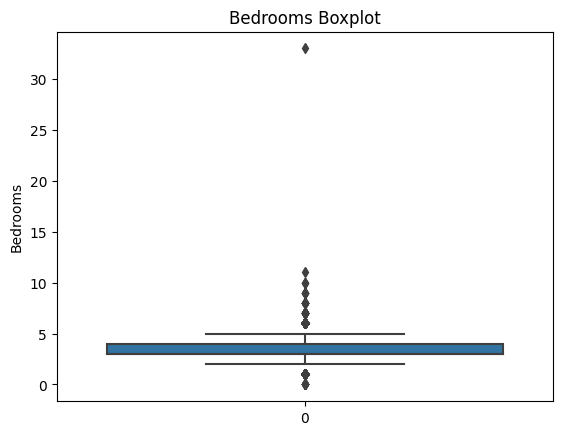

In [3027]:
sns.boxplot(df['bedrooms'])
plt.title("Bedrooms Boxplot")
plt.ylabel("Bedrooms")

In [3028]:
df[df['bedrooms'] > 25]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [3029]:
df.drop(15870, axis=0, inplace=True)

In [3030]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160400e+04,21604,2.160400e+04,21604.000000,21604.000000,21604.000000,2.160400e+04,21604.000000,21604.000000,21604.000000,...,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000,21604.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580650e+09,NaN,5.388100e+05,3.368821,2.113451,2077.518885,1.493659e+04,1.494168,0.007452,0.233383,...,7.655619,1786.737317,290.781568,1971.006434,84.159832,98077.954175,47.560036,-122.213935,1986.032170,12659.682744
std,2.876198e+09,NaN,3.572691e+05,0.907295,0.765966,907.351017,3.899423e+04,0.539886,0.086007,0.764536,...,1.173111,821.962467,439.876127,29.370010,401.126326,53.506844,0.138563,0.140802,684.612437,25859.965662
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,NaN,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.067750e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000


In [3031]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [3032]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21604 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21604 non-null  int64         
 1   date           21604 non-null  datetime64[ns]
 2   price          21604 non-null  float64       
 3   bedrooms       21604 non-null  int64         
 4   bathrooms      21604 non-null  float64       
 5   sqft_living    21604 non-null  int64         
 6   sqft_lot       21604 non-null  int64         
 7   floors         21604 non-null  float64       
 8   waterfront     21604 non-null  int64         
 9   view           21604 non-null  int64         
 10  condition      21604 non-null  int64         
 11  grade          21604 non-null  int64         
 12  sqft_above     21604 non-null  int64         
 13  sqft_basement  21604 non-null  int64         
 14  yr_built       21604 non-null  int64         
 15  yr_renovated   21604 non

Text(0.5, 1.0, 'Price Versus Bedrooms')

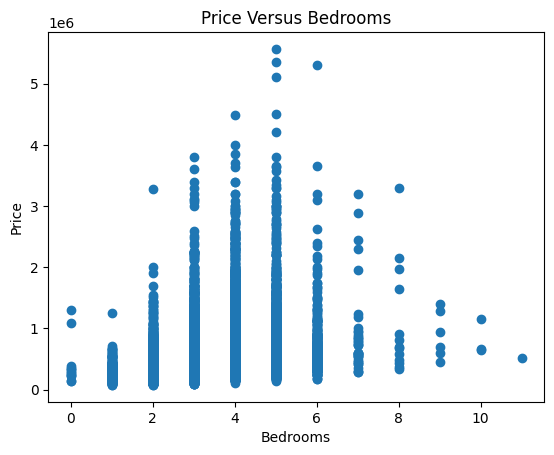

In [3033]:
#Since our focus is centered on price, lets determine the relationship between price and the other variables to determine more potential 
#outliers and best potential relationships between price and other variables
plt.scatter(y='price', x='bedrooms', data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price Versus Bedrooms")

Text(0.5, 1.0, 'Price Versus Bathrooms')

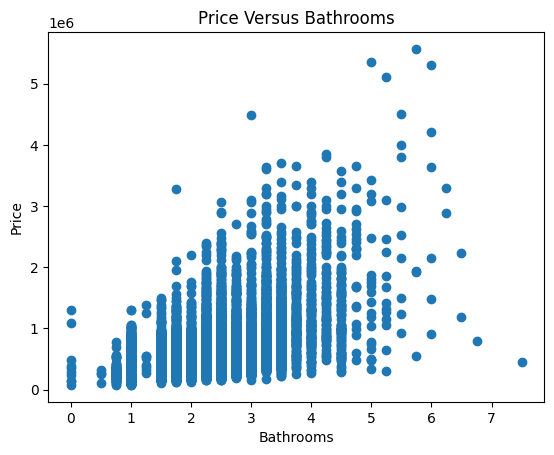

In [3034]:
plt.scatter(y='price', x='bathrooms', data=df)
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Price Versus Bathrooms")

Text(0.5, 1.0, 'Price Versus Square Foot Living')

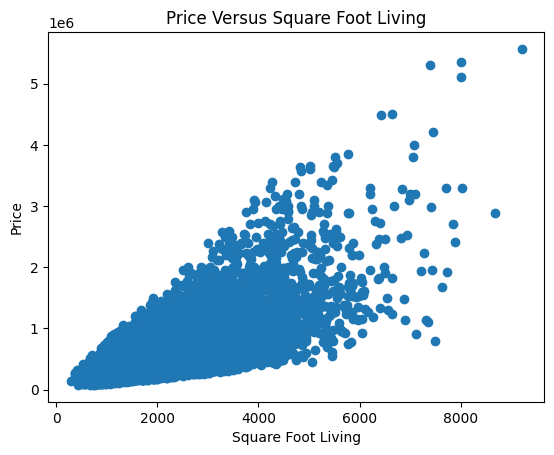

In [3035]:
plt.scatter(y='price', x='sqft_living', data=df)
plt.xlabel("Square Foot Living")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Living")

Text(0.5, 1.0, 'Price Versus Square Foot Lot')

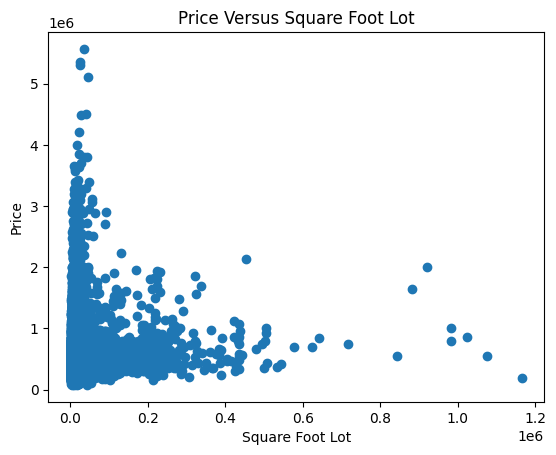

In [3036]:
plt.scatter(y='price', x='sqft_lot', data=df)
plt.xlabel("Square Foot Lot")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Lot")

Text(0.5, 1.0, 'Price Versus Floors')

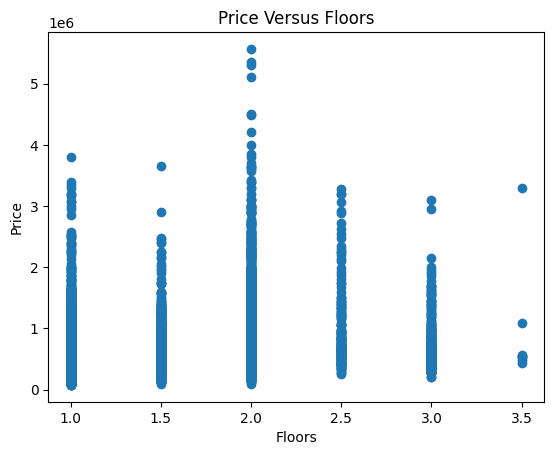

In [3037]:
plt.scatter(y='price', x='floors', data=df)
plt.xlabel("Floors")
plt.ylabel("Price")
plt.title("Price Versus Floors")

Text(0.5, 1.0, 'Price Versus Waterfront')

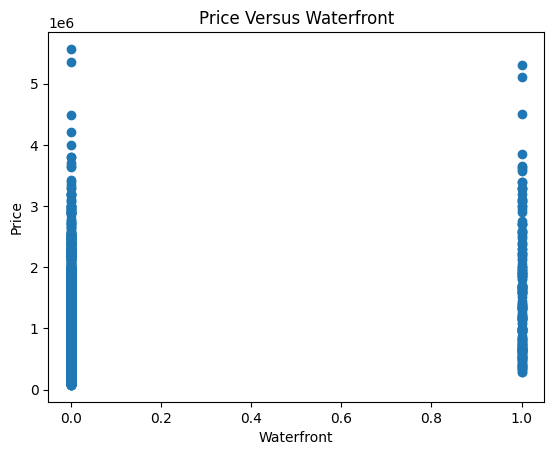

In [3038]:
plt.scatter(y='price', x='waterfront', data=df)
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.title("Price Versus Waterfront")

Text(0.5, 1.0, 'Price Versus View')

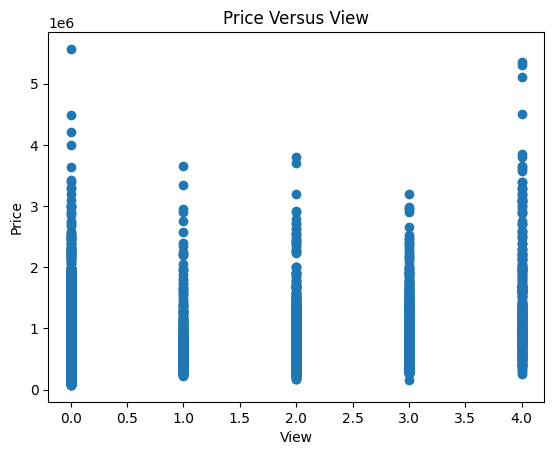

In [3039]:
plt.scatter(y='price', x='view', data=df)
plt.xlabel("View")
plt.ylabel("Price")
plt.title("Price Versus View")

Text(0.5, 1.0, 'Price Versus Condition')

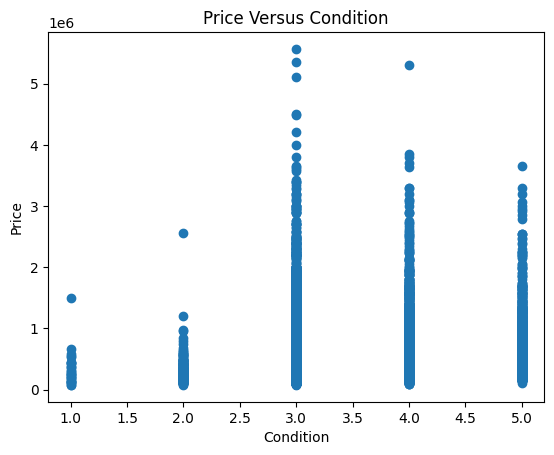

In [3040]:
plt.scatter(y='price', x='condition', data=df)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price Versus Condition")

Text(0.5, 1.0, 'Price Versus Grade')

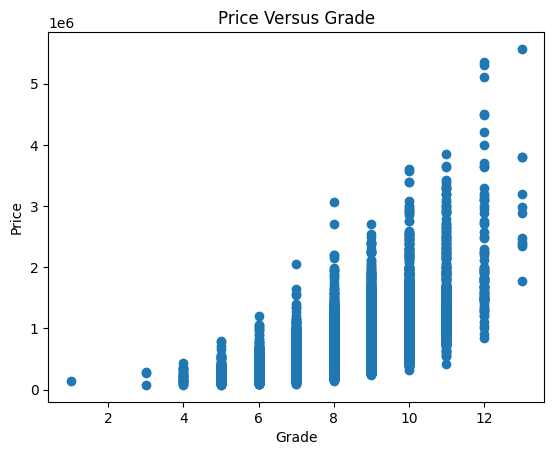

In [3041]:
plt.scatter(y='price', x='grade', data=df)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price Versus Grade")

Text(0.5, 1.0, 'Price Versus Square Foot Above')

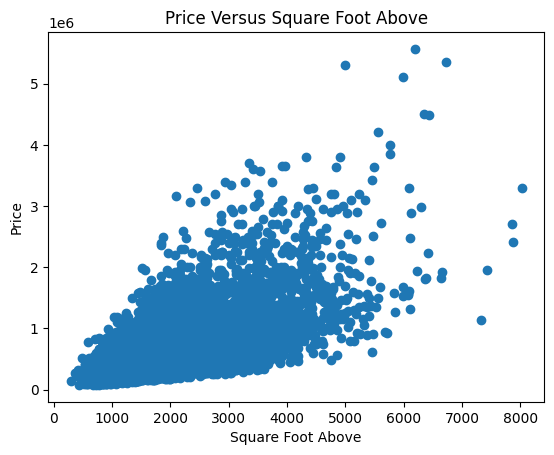

In [3042]:
plt.scatter(y='price', x='sqft_above', data=df)
plt.xlabel("Square Foot Above")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Above")

Text(0.5, 1.0, 'Price Versus Square Foot Basement')

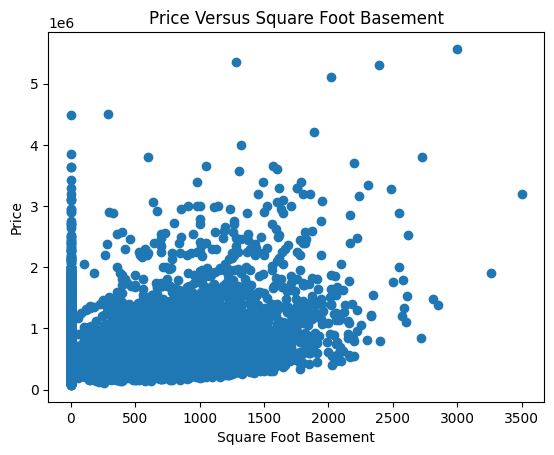

In [3043]:
plt.scatter(y='price', x='sqft_basement', data=df)
plt.xlabel("Square Foot Basement")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Basement")

Text(0.5, 1.0, 'Price Versus Year Built')

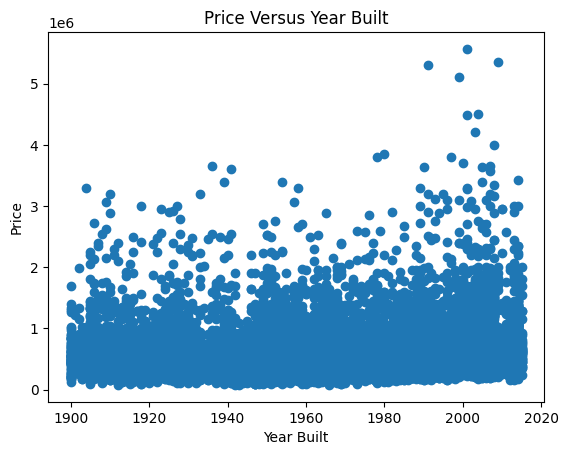

In [3044]:
plt.scatter(y='price', x='yr_built', data=df)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Price Versus Year Built")

Text(0.5, 1.0, 'Price Versus Year Renovated')

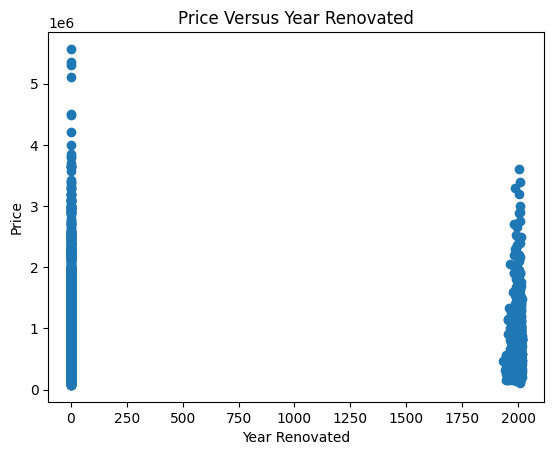

In [3045]:
plt.scatter(y='price', x='yr_renovated', data=df)
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.title("Price Versus Year Renovated")

Text(0.5, 1.0, 'Price Versus Zipcode')

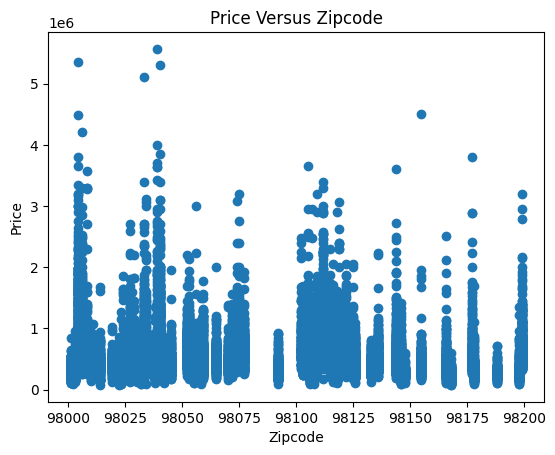

In [3046]:
plt.scatter(y='price', x='zipcode', data=df)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Price Versus Zipcode")

Text(0.5, 1.0, 'Price Versus Latitude')

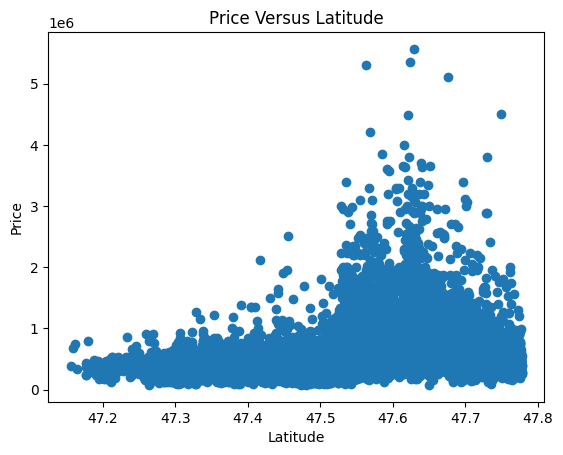

In [3047]:
plt.scatter(y='price', x='lat', data=df)
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.title("Price Versus Latitude")

Text(0.5, 1.0, 'Price Versus Longtitude')

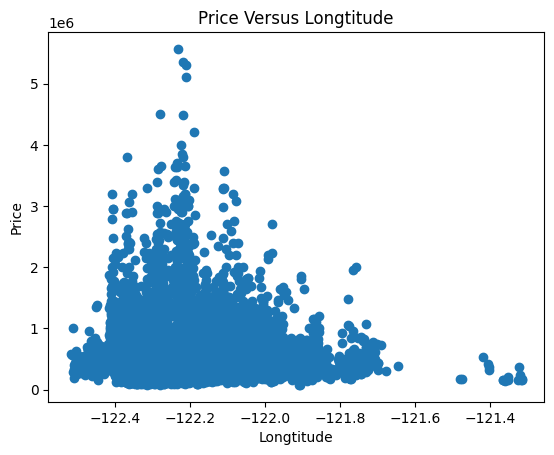

In [3048]:
plt.scatter(y='price', x='long', data=df)
plt.xlabel("Longtitude")
plt.ylabel("Price")
plt.title("Price Versus Longtitude")

Text(0.5, 1.0, 'Price Versus Square Foot Living 15')

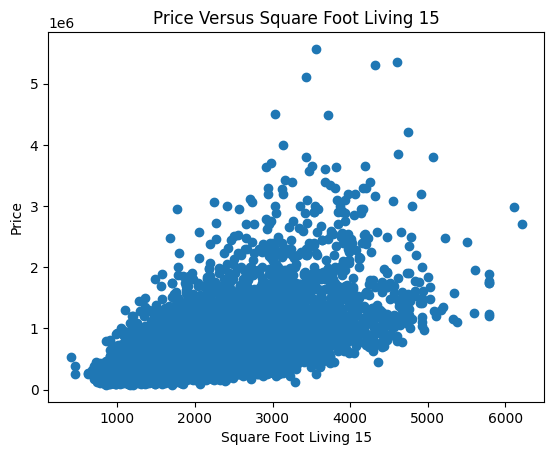

In [3049]:
plt.scatter(y='price', x='sqft_living15', data=df)
plt.xlabel("Square Foot Living 15")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Living 15")

Text(0.5, 1.0, 'Price Versus Square Foot Lot 15')

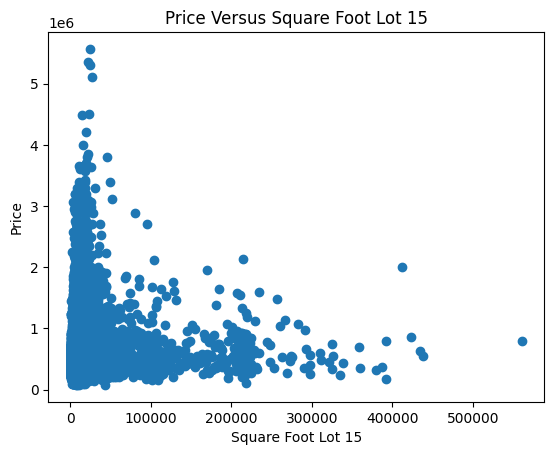

In [3050]:
plt.scatter(y='price', x='sqft_lot15', data=df)
plt.xlabel("Square Foot Lot 15")
plt.ylabel("Price")
plt.title("Price Versus Square Foot Lot 15")

In [3051]:
#Due to extremely high prices creating a bias in the data, the data frame will be for prices 2 million and under.
df[df['sqft_lot15'] > 200000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
419,8678500060,2014-07-10,1550000.0,5,4.25,6070,171626,2.0,0,0,...,12,6070,0,1999,0,98024,47.5954,-121.950,4680,211267
443,822079033,2015-04-22,350000.0,3,1.50,1250,219978,1.0,0,0,...,6,1250,0,1980,0,98038,47.4056,-121.955,1930,210394
527,3225079035,2014-06-18,1600000.0,6,5.00,6050,230652,2.0,0,3,...,11,6050,0,2001,0,98024,47.6033,-121.943,4210,233971
681,3526069070,2014-05-28,799000.0,4,3.00,2580,209523,2.0,0,0,...,8,2580,0,1984,0,98053,47.6932,-122.006,3440,213444
762,826079094,2015-03-24,330000.0,3,2.00,1400,218252,1.0,0,0,...,7,1400,0,1997,0,98019,47.7576,-121.934,2230,218222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21090,1624079024,2014-05-15,720000.0,3,2.50,3150,151588,2.0,0,0,...,9,3150,0,2007,0,98024,47.5720,-121.926,2410,208652
21325,2826079027,2014-11-12,659000.0,3,2.50,3090,384634,2.0,0,0,...,8,3090,0,2007,0,98019,47.7072,-121.927,2200,292645
21344,8835770170,2014-08-22,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
21351,3421069049,2014-10-21,565000.0,2,1.75,1130,276170,1.0,0,0,...,8,1130,0,2006,0,98022,47.2673,-122.027,2092,217800


In [3052]:
#To remove bias from the data, the model will be for houses under the price of 1,500,000
df.drop(df[df["price"] > 1500000].index, axis=0, inplace=True)

In [3053]:
df.drop(13464, axis=0, inplace=True)

In [3054]:
#Lets determine an R-squared value based on the strong correlating graphs
results = ols("price ~ bathrooms + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     5298.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:15   Log-Likelihood:            -2.8225e+05
No. Observations:               21093   AIC:                         5.645e+05
Df Residuals:                   21086   BIC:                         5.646e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.33e+06   8.96e+04     59.476

In [3055]:
#R-squared is not good enough, lets create different variables to help strengthen it
def grade_cat(grade):
    if grade > 0 and  grade <= 3:
        return 1
    elif grade >= 4 and grade <= 6:
        return 2
    elif grade >= 7 and grade <= 10:
        return 3
    else:
        return 4

In [3056]:
# apply function
df['grade_cat'] = df['grade'].apply(grade_cat)

In [3057]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_cat
count,2.109300e+04,21093,2.109300e+04,21093.000000,21093.000000,21093.000000,2.109300e+04,21093.000000,21093.000000,21093.000000,...,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000
mean,4.592901e+09,2014-10-29 02:57:05.401792,5.012274e+05,3.348646,2.080347,2022.046176,1.460522e+04,1.485327,0.003982,0.199829,...,1743.461385,278.584791,1970.908169,79.095909,98078.388660,47.558674,-122.213642,1953.961978,12469.640686,2.903380
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.125059e+09,2014-07-22 00:00:00,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,...,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.465900,-122.330000,1480.000000,5078.000000,3.000000
50%,3.905040e+09,2014-10-16 00:00:00,4.450000e+05,3.000000,2.250000,1890.000000,7.552000e+03,1.000000,0.000000,0.000000,...,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.569400,-122.231000,1820.000000,7564.000000,3.000000
75%,7.334501e+09,2015-02-17 00:00:00,6.250000e+05,4.000000,2.500000,2500.000000,1.045400e+04,2.000000,0.000000,0.000000,...,2160.000000,540.000000,1996.000000,0.000000,98118.000000,47.678900,-122.124000,2320.000000,9994.000000,3.000000
max,9.900000e+09,2015-05-27 00:00:00,1.500000e+06,11.000000,7.500000,7480.000000,1.164794e+06,3.500000,1.000000,4.000000,...,7320.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,4.000000
std,2.878694e+09,NaN,2.482212e+05,0.897772,0.732382,824.521731,3.776341e+04,0.538165,0.062982,0.695776,...,762.129930,422.536769,29.279130,389.370587,53.393502,0.139672,0.141704,648.252291,25422.034584,0.337681


In [3058]:
results = ols("price ~ bathrooms + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15 + grade_cat", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4578.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:15   Log-Likelihood:            -2.8220e+05
No. Observations:               21093   AIC:                         5.644e+05
Df Residuals:                   21085   BIC:                         5.645e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.315e+06   8.94e+04     59.445

In [3059]:
#Lets incorporate another variable using the price, square feet, and zipcode
#The goal is to get the average price for each size house for the relative area
price_sqft_living_zipcode = df.groupby('zipcode')['price'].mean()/df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(price_sqft_living_zipcode.rename('price_sqft_living_zipcode'), left_on='zipcode', right_index=True)

In [3060]:
#Lets incorporate another variable using the price, square feet, and year built
#The goal is to get the average price for each size house for the relative year
price_sqft_living_yr_built = df.groupby('yr_built')['price'].mean()/df.groupby('yr_built')['sqft_living'].mean()
df = df.merge(price_sqft_living_yr_built.rename('price_sqft_living_yr_built'), left_on='yr_built', right_index=True)

In [3061]:
results = ols("price ~ bathrooms + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15 + grade_cat + price_sqft_living_zipcode + price_sqft_living_yr_built", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     9668.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:            -2.7471e+05
No. Observations:               21093   AIC:                         5.494e+05
Df Residuals:                   21083   BIC:                         5.495e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3062]:
results = ols("price ~ bedrooms + bathrooms + floors + waterfront + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15 + grade_cat + price_sqft_living_zipcode + price_sqft_living_yr_built", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     7751.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:            -2.7414e+05
No. Observations:               21093   AIC:                         5.483e+05
Df Residuals:                   21080   BIC:                         5.484e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3063]:
#Add additional variables to improve values
results = ols("price ~ lat + long + bedrooms + bathrooms + floors + waterfront + view + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15 + grade_cat + price_sqft_living_zipcode + price_sqft_living_yr_built", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     6612.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:            -2.7358e+05
No. Observations:               21093   AIC:                         5.472e+05
Df Residuals:                   21077   BIC:                         5.473e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3064]:
df[df['bathrooms'] > 7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_cat,price_sqft_living_zipcode,price_sqft_living_yr_built
8546,424049043,2014-08-11,450000.0,9,7.5,4050,6504,2.0,0,0,...,1996,0,98144,47.5923,-122.301,1448,3866,3,295.229859,227.87561


In [3065]:
df.drop(8546, axis=0, inplace=True)

In [3066]:
results = ols("price ~ zipcode + lat + long + bedrooms + bathrooms + floors + waterfront + view + sqft_living + grade + sqft_above + sqft_basement + yr_built + sqft_living15 + grade_cat + price_sqft_living_zipcode + price_sqft_living_yr_built", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     6238.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:            -2.7351e+05
No. Observations:               21092   AIC:                         5.471e+05
Df Residuals:                   21075   BIC:                         5.472e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3067]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21092 entries, 0 to 17660
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          21092 non-null  int64         
 1   date                        21092 non-null  datetime64[ns]
 2   price                       21092 non-null  float64       
 3   bedrooms                    21092 non-null  int64         
 4   bathrooms                   21092 non-null  float64       
 5   sqft_living                 21092 non-null  int64         
 6   sqft_lot                    21092 non-null  int64         
 7   floors                      21092 non-null  float64       
 8   waterfront                  21092 non-null  int64         
 9   view                        21092 non-null  int64         
 10  condition                   21092 non-null  int64         
 11  grade                       21092 non-null  int64         


In [3068]:
categorical_features = ['floors','waterfront', 'view', 'grade', 'grade_cat']
numerical_features = ['zipcode', 'lat', 'long', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'price_sqft_living_zipcode', 'price_sqft_living_yr_built']
target = 'price'

In [3069]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.2, random_state=1234)

In [3070]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [3071]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [3072]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [3073]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'grade',
                                                   'grade_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['zipcode', 'lat', 'long',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'sqft_living15',
                                                   'price_sqft_living_zipcode',
                                                   'price_sqft_living_yr_built'])])),
                ('regressor', LinearRegression())])

In [3074]:
pred = linear_regression.predict(X_test)

In [3075]:
pred

array([523136., 502400., 422912., ..., 534208., 585984., 484736.])

In [3076]:
np.sqrt(mean_squared_error(pred,y_test))

99019.80943511378

In [3077]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

In [3078]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'grade',
                                                   'grade_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['zipcode', 'lat', 'long',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'sqft_living15',
                                                   'price_sqft_living_zipcode',
                                                   'price_sqft_living_yr_built'])])),
                ('regressor', Ridge(alpha=0.1))])

In [3079]:
pred_ridge = ridge_regression.predict(X_test)

In [3080]:
np.sqrt(mean_squared_error(y_test, pred_ridge))

98967.98753862747

In [3081]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [3082]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'grade',
                                                   'grade_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['zipcode', 'lat', 'long',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'sqft_living15',
                                                   'price_sqft_living_zipcode',
                                                   'price_sqft_living_yr_built'])])),
                ('regressor', Lasso())])

In [3083]:
lasso_pred = lasso_regression.predict(X_test)

In [3084]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

98967.81862317711

In [3085]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [3086]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'grade',
                                                   'grade_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['zipcode', 'lat', 'long',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'sqft_living15',
                                                   'price_sqft_living_zipcode',
                                                   'price_sqft_living_yr_built'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [3087]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [3088]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

111820.65038529702

In [3089]:
df['price'].mean()

501229.79224350466

Question 1 (The assumption I am making is that question 1 is about how the data was cleaned, while question 2 is about the results)

When the data set was established, the first thing I did was make a histogram of every variable. This is to have a visual representation of the values to determine if there were any potential outliers. Before making a Box Plot to reveal the outliers, code was inputted to remove duplicates. Once that was excuted, box plots were made to remove obvious outliers. After that, since the goal of our analysis is price, a scatter plot between price and all variables were created. The point was to reveal which variables had the strongest correlation with price to use in the model. At this point further outliers were removed and it was noticed how high the prices were, which carries a potential for bias in the data. That is why an aributary number of 1,500,000 was used a benchmark to remove unwarrented data. A select number of variables were used in an Ordinary Least Squares Regression with a summary of the results printed to view the R-squared value. This was the best for the data set simply because it is the most efficient way to providing context to the results. The R-squared value was not good enough, so additional variables were created. Categories for the grade of the house was used since those values are better represented in lump sums as opposed to being individual (for example, there is not a big difference in quality of house between 1 and 2). This marginally improved the results, so more variables were created. In my opinion and backed up by the data, the major factors affect house price are the location (neighbourhoods have different prices) and the year built (more recent a house was built, the more modernized it is and therefore higher priced). However, when thinking logically the square foot of the house is most important. That is why two additional variables were created for the house price for a certain square foot size grouped by the location and by another one by the year built. This improve the results, but for further improvements additional variables in the dataset were inputted into the Ordinary Least Squares and got an R-square value of 0.826, a strong correlation.

Question 2

An evaluation of the model of the model was done using linear regression, Ridge, LASSO, and Elastic Net. Ridge generated the best results which is one of the reasons why I know this was the best model to use. I understand this is not feasibile when the dataset is significantly larger than this, but for this dataset it is possible, which is why it was done. Before the analysis was conducted, it was debate between linear regression and Ridge as to which model would be the best. This is because the model had a strong correlation, meaning the data was somewhat linear. Linear Regression and Ridge are relatively similar in terms of their analysis, but Ridge handles data that is not completely linear better. As mentioned in the previous answer the R-squared value was 0.826. While that is classified as strong, the value can be up to 1, so the difference between 1 and 0.826 was enough for me to conclude that Ridge was going to be the best model, which it was.

Question 3

Most Business Excutitives are not familar with the type of techincal work conducted here. For them to understand, the drivers of house price would need to be presented in a way they could comprehend. That is why the graphs between price and every variable were constructed. They show that the biggest drivers were all the square feet variables not pertaining to the lot, bathrooms, and grade. Additional variables discussed in answer 1 were selected based more on logical thinking. Actual statisical analysis were not conducted but the correlation present in the graphs show a strong correlation, that when put together in a model resulted in a strong correlation.